# Credit_EDA_Case_Study

## 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Setting display options to view all columns and rows to improve the analysis
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## 2. Loading application data to understand customers details for analysing loan defaulters

In [3]:
##load application data and analyze top 20 records
df_appln_data=pd.read_csv('application_data.csv')
df_appln_data.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## 3. Invistigate input file (Check structure/metadata of data)

- Analyzing columns and their data types using info()
- Describing numerical attributes
- Analyzing shape, structure.
- Identify population health of the application data 

#### Objective :The above pointers will help to further enhance data understaning and also form the basis of on going analysis

In [4]:
# check structure of all columns
df_appln_data.info(True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
##check shape of input data
df_appln_data.shape

(307511, 122)

In [6]:
## observe statistical information of the application data of numeric columns 
df_appln_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## 4. Missing Value Check

- As part of this section all the columns will be analyzed and useful columns will be filtered out that are required to meet objective
- Critical columns having missing/ NULL values will dropped/imputed according to the column population percentages
- We will be handling the missing values based on following stratagies:
    - MCAR (Missing completely at random)
    - MAR (Missing at random)
    - MNAR (Missing not at random)


In [7]:
###check for missing data of all columns
df_appln_data.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
## check percentage of missing values in each column 
df_missing_value_percentage = 100*df_appln_data.isnull().sum()/len(df_appln_data)
##get the columns having missing value percentage more then 45 to a list
df_missing_value_percentage[df_missing_value_percentage>=45]

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [9]:
#### according to above observation, create list of columns with missing value percentage >45 
df_missing_value_percentage_col=df_missing_value_percentage[df_missing_value_percentage>=45]
df_missing_value_percentage_col

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [10]:
#drop columns with percentage of missing value >45
df_appln_data_1=df_appln_data.drop(columns=df_missing_value_percentage_col.index)
##validating the shape after dropping the columns
df_appln_data_1.shape

(307511, 73)

In [11]:
## again check for missing data and its percentage
df_appln_data_1.isna().sum()
df_appln_data_check_missing1=100*df_appln_data_1.isnull().sum()/len(df_appln_data)
df_appln_data_check_missing1[df_appln_data_check_missing1>=45] 

Series([], dtype: float64)

In [12]:
##validate missing value percentage
100*df_appln_data_1.isnull().sum()/len(df_appln_data)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

#### By analysing data it was observed OCCUPATION_TYPE place vital role in deciding weather the customer will able to repay loan or not. Hence it becomes crucial to analyse and handle missing values for this particular column.

#### observe columns having missing value percentage >30

In [13]:
df_appln_data_check_missing1[df_appln_data_check_missing1>=30] 

OCCUPATION_TYPE    31.345545
dtype: float64

In [14]:
##Observe value counts of OCCUPATION_TYPE column
df_appln_data_1.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [15]:
##Check missing values of Occupation type column
df_appln_data_1.OCCUPATION_TYPE.isna().sum()

96391

<AxesSubplot:>

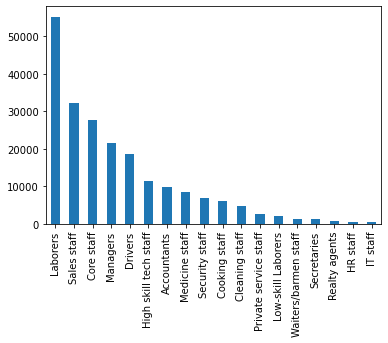

In [16]:
## plot the bar plot for all the occupation and observe the graph
df_appln_data_1['OCCUPATION_TYPE'].value_counts().plot(kind='bar')

#### Observation: 
- Laborers is having heighest categaory for occupation
- Reality agents, HR staff, IT staff are the lowest among all occupation types


In [17]:
## check mode of OCCUPATION_TYPE column
df_appln_data_1.mode()['OCCUPATION_TYPE'][0]

'Laborers'

In [18]:
## check correlation between null occupation and target variable
df_occupation_null=df_appln_data_1[df_appln_data_1['OCCUPATION_TYPE'].isnull()]
df_occupation_null['TARGET'].value_counts() 

0    90113
1     6278
Name: TARGET, dtype: int64

In [19]:
##check correlation between occupation type = 'Laborers' and target variable
df_appln_data_1[df_appln_data_1['OCCUPATION_TYPE']=='Laborers'].TARGET.value_counts()

0    49348
1     5838
Name: TARGET, dtype: int64

#### Even though this column has more than 30% missing values ,this column can't be dropped as it carries critical information about the customers hence a new category name unknow is created to fill these missing values

In [20]:
##create new category ='Unknown' for occupation type and storing the result in new dataframe named 'df_appln_data_3'
##furter analysis will be on new dataframe 'df_appln_data_3'
df_appln_data_1['OCCUPATION_TYPE']=df_appln_data_1['OCCUPATION_TYPE'].fillna('Unknown')
df_appln_data_3=df_appln_data_1
df_appln_data_3.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

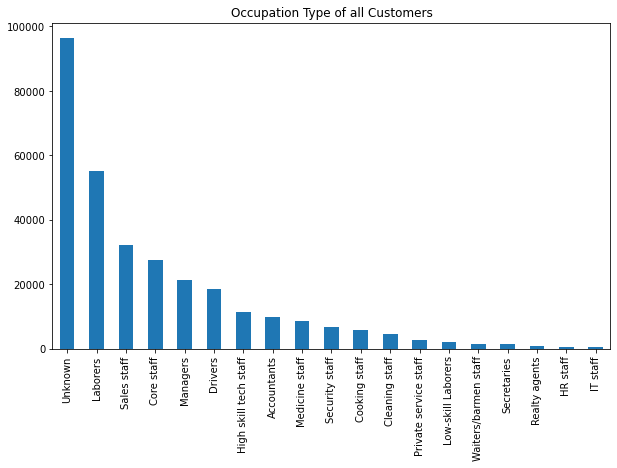

In [21]:
##Plot occupatio_type 
plt.figure(figsize=[10,6])
OCCUPATION_TYPE1 = df_appln_data_3.OCCUPATION_TYPE.value_counts()
graph = OCCUPATION_TYPE1.plot.bar()
graph.set_title("Occupation Type of all Customers")
plt.show()

In [22]:
##validating the shape again
df_appln_data_3.shape

(307511, 73)

#### There are still many unwantd columnns which are present in the data that doesn't provide any valuable insights as such hence the best approach to tackle such cases is to drop these redundent columns 

In [23]:
##check column names 
df_appln_data_3.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

#### In general it has been observed that flag_document column doesn't provide any information regarding the type of the document and doesn't seems to be relevent with achive the business objective hence dropping these columns to improve effectivness of the analysis

In [24]:
##make list of unwanted columns
drop_column=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [25]:
## drop the above listed columns and storing it in new dataframes which will be used for further analysis
df_appln_data_4=df_appln_data_3.drop(columns=drop_column)
df_appln_data_4.shape

(307511, 53)

In [26]:
##Observe the column names of Application data
df_appln_data_4.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [27]:
#### still there are some other unwanted columns, find such columns and drop
df_appln_data_4.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Still these are some irrelevent columns which are not required for further analysis, find such columns and drop them

#### According to the observation, following columns are not required for further analysis
- 'FLAG_EMP_PHONE' : Did client provide work phone (1=YES, 0=NO)
- 'FLAG_WORK_PHONE' : Did client provide home phone (1=YES, 0=NO)
- 'FLAG_CONT_MOBILE' : Was mobile phone reachable (1=YES, 0=NO)
- 'FLAG_PHONE' : Did client provide mobile phone (1=YES, 0=NO)
- 'FLAG_EMAIL' : Did client provide email (1=YES, 0=NO)
- 'REGION_RATING_CLIENT' : Our rating of the region where client lives (1,2,3)
- 'REGION_RATING_CLIENT_W_CITY' : Our rating of the region where client lives with taking city into acco
- 'DAYS_LAST_PHONE_CHANGE' : How many days before application did client change 
- 'OBS_30_CNT_SOCIAL_CIRCLE' : How many observation of client's social surroundings with observable 30 DPD (days past due) default
- 'DEF_30_CNT_SOCIAL_CIRCLE' : How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
- 'OBS_60_CNT_SOCIAL_CIRCLE' : How many observation of client's social surroundings with observable 60 DPD (days past due) default
- 'DEF_60_CNT_SOCIAL_CIRCLE' : How many observation of client's social surroundings defaulted on 60 (days past due) DPD
- 'AMT_REQ_CREDIT_BUREAU_HOUR' : Number of enquiries to Credit Bureau about the client one hour before application
- 'AMT_REQ_CREDIT_BUREAU_DAY' : Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
- 'AMT_REQ_CREDIT_BUREAU_WEEK' : Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
- 'AMT_REQ_CREDIT_BUREAU_MON' : Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
- 'AMT_REQ_CREDIT_BUREAU_QRT' : Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
- 'AMT_REQ_CREDIT_BUREAU_YEAR' : Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)
- 'NAME_TYPE_SUITE' : Who accompanied client when applying for the previous application
- 'REGION_POPULATION_RELATIVE' : Normalized population of region where client lives (higher number means the client lives in more populated region)
- 'WEEKDAY_APPR_PROCESS_START' : On which day of the week did the client apply for the loan
- 'HOUR_APPR_PROCESS_START' : Approximately at what hour did the client apply for the loan
- 'REG_REGION_NOT_LIVE_REGION' : Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
- 'REG_REGION_NOT_WORK_REGION' : Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
- 'LIVE_REGION_NOT_WORK_REGION' : Flag if client's contact address does not match work address (1=different, 0=same, at region level)
- 'REG_CITY_NOT_LIVE_CITY' : Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
- 'REG_CITY_NOT_WORK_CITY' : Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
- 'LIVE_CITY_NOT_WORK_CITY' : Flag if client's contact address does not match work address (1=different, 0=same, at city level)

In [28]:
##dropping columns 
columns_drop=['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE',
        'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE',
       'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY']
df_appln_data_4=df_appln_data_4.drop(columns=columns_drop)
df_appln_data_4.shape

(307511, 25)

In [29]:
##again check the column names of data
df_appln_data_4.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3'],
      dtype='object')

#### According to analysis these are the importent columns required to achive objective
#### Now check for the data types of the column and change the data types if its is required

In [30]:
##checking the data types for the selected columns
df_appln_data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307499 non-null  float64
 10  AMT_GOODS_PRICE      307233 non-null  float64
 11  NAME_INCOME_TYPE     307511 non-null  object 
 12  NAME_EDUCATION_TYPE  307511 non-null  object 
 13  NAME_FAMILY_STATUS   307511 non-null  object 
 14  NAME_HOUSING_TYPE    307511 non-null  object 
 15  DAYS_BIRTH       

### Data handling for the selected columns

In [31]:
##observe the data of gender column
df_appln_data_4.CODE_GENDER.value_counts() ## check for XNA value 

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [32]:
##Analyzing gender code 
df_appln_data_4[df_appln_data_4['CODE_GENDER']=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Working,Secondary / secondary special,Married,Municipal apartment,-20232,-10044,-10024.0,-3537,1,Unknown,2.0,Business Entity Type 1,0.295998,0.461482
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Working,Secondary / secondary special,Married,House / apartment,-13717,-2797,-2241.0,-4659,1,Low-skill Laborers,4.0,Industry: type 3,0.709205,0.310818
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Working,Higher education,Married,House / apartment,-10647,-1228,-183.0,-1671,1,Core staff,3.0,Kindergarten,0.659185,0.076984
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Commercial associate,Incomplete higher,Civil marriage,House / apartment,-9649,-2293,-4099.0,-2326,1,Unknown,2.0,Medicine,0.658620,0.360613


In [33]:
## find Mode of Gender Code
code_gender_mode=df_appln_data_4.mode()['CODE_GENDER'][0]

In [34]:
## now impute the 'XNA' value with its mode i.e. 'F'
df_appln_data_4['CODE_GENDER']=df_appln_data_4['CODE_GENDER'].apply(lambda x: code_gender_mode if x=='XNA' else x) 
df_appln_data_4['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### Columns DAYS_BIRTH , DAYS_EMPLOYED , DAYS_REGISTRATION ,  DAYS_ID_PUBLISH have data types int and float ; observe this columns and change the data type if requited

In [35]:
#### Handling data of DAYS_BIRTH , DAYS_EMPLOYED , DAYS_REGISTRATION , DAYS_ID_PUBLISH columns 
df_appln_data_4[['DAYS_BIRTH' , 'DAYS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


#### data of 'DAYS_BIRTH' , 'DAYS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH' these columns is negative but days can not be negative. So convert the values of these column to positive integer.

In [36]:
## change negative interger to positive using abs() function
df_appln_data_4[['DAYS_BIRTH' , 'DAYS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']] = df_appln_data_4[['DAYS_BIRTH' , 'DAYS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']].abs()
df_appln_data_4[['DAYS_BIRTH' , 'DAYS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461.0,637.0,3648.0,2120.0
1,16765.0,1188.0,1186.0,291.0
2,19046.0,225.0,4260.0,2531.0
3,19005.0,3039.0,9833.0,2437.0
4,19932.0,3038.0,4311.0,3458.0
...,...,...,...,...
307506,9327.0,236.0,8456.0,1982.0
307507,20775.0,365243.0,4388.0,4090.0
307508,14966.0,7921.0,6737.0,5150.0
307509,11961.0,4786.0,2562.0,931.0


#### Convert days_birth and DAYS_EMPLOYED to years for easy understanding

In [37]:
#### convert days_birth colun to age (age in years = age in days / 365)
df_appln_data_4['YEARS_BIRTH']= (df_appln_data_4['DAYS_BIRTH']/365).astype('int64')
##drop DAYS_BIRTH column as it is not required for further analysis
df_appln_data_4.drop(['DAYS_BIRTH'], inplace=True, axis=1)

df_appln_data_4['YEARS_BIRTH']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: YEARS_BIRTH, Length: 307511, dtype: int64

In [38]:
df_appln_data_4['YEARS_EMPLOYED']= (df_appln_data_4['DAYS_EMPLOYED']/365).astype('int64')
##drop DAYS_EMPLOYED column as it is not required for further analysis
df_appln_data_4.drop(['DAYS_EMPLOYED'], inplace=True, axis=1)

df_appln_data_4['YEARS_EMPLOYED']

0            1
1            3
2            0
3            8
4            8
          ... 
307506       0
307507    1000
307508      21
307509      13
307510       3
Name: YEARS_EMPLOYED, Length: 307511, dtype: int64

In [39]:
##check datatype and change it to int
df_appln_data_4[['YEARS_BIRTH' , 'YEARS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']] =df_appln_data_4[['YEARS_BIRTH' , 'YEARS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']].astype('int64')
df_appln_data_4[['YEARS_BIRTH' , 'YEARS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']] 

,YEARS_BIRTH,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,25,1,3648,2120
1,45,3,1186,291
2,52,0,4260,2531
3,52,8,9833,2437
4,54,8,4311,3458
...,...,...,...,...
307506,25,0,8456,1982
307507,56,1000,4388,4090
307508,41,21,6737,5150
307509,32,13,2562,931


In [40]:
##Analyze the values of ORGANIZATION_TYPE column
df_appln_data_4.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### Analyze the values of ORGANIZATION_TYPE column. There are many 'XNA' values are present in this column. Impute XNA values with new category 'Unknown' 

#### Handling the unstructured values in organizaztion type

In [41]:
## replace 'XNA' with Unknown category 
df_appln_data_4['ORGANIZATION_TYPE']=df_appln_data_4.ORGANIZATION_TYPE.apply(lambda x: 'Unknown' if x=="XNA" else x )
##Handling the unstructured values in organizaztion type
df_appln_data_4['ORGANIZATION_TYPE']=df_appln_data_4.ORGANIZATION_TYPE.apply(lambda x: x.split()[0] + ' ' + x.split()[1] if 'Type'in x else x )
##Handling the unstructured values in organizaztion type
df_appln_data_4['ORGANIZATION_TYPE']=df_appln_data_4.ORGANIZATION_TYPE.apply(lambda x: x.split(':')[0] if 'type'in x else x )

In [42]:
##check structure of ORGANIZATION_TYPE
df_appln_data_4.ORGANIZATION_TYPE.value_counts()

Business Entity        84529
Unknown                55374
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion      

## 5. Outliers check

#### Identifying outliers in the data to ensure that prediction or insights drawn are valid and authenticated. 

#### Objective : extreame values shall not effect the overall analysis


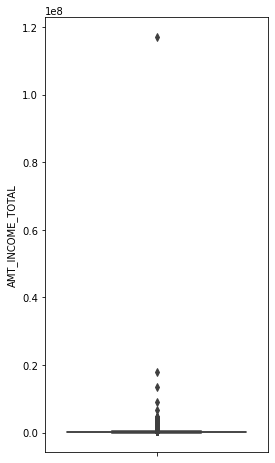

In [43]:
##plot box plot of AMT_INCOME_TOTAL column to check if any outlier is present
plt.figure(figsize = (4,8))
sns.boxplot( y=df_appln_data_4['AMT_INCOME_TOTAL'])
plt.show()

#### Inference : Outliers are present in AMT_INCOME_TOTAL column 
#### As a best practise we'll b eremoving this since the value is huge

In [44]:
##Remove the outliers
df_appln_data_4=df_appln_data_4[df_appln_data_4['AMT_INCOME_TOTAL'] <= 5*pow(10,6)]

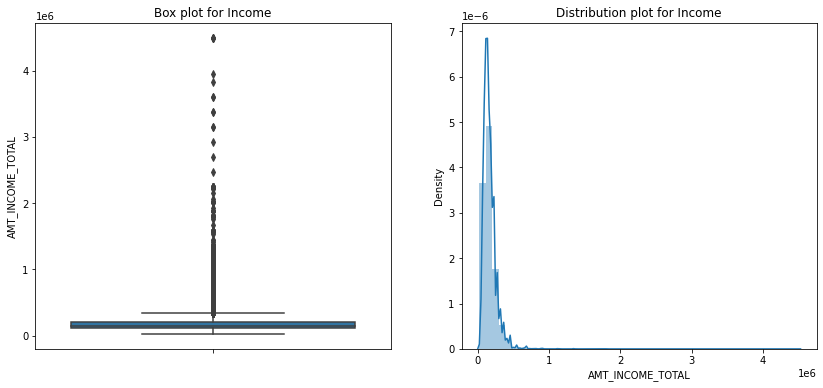

In [45]:
##plot box plot of AMT_INCOME_TOTAL column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot( y=df_appln_data_4['AMT_INCOME_TOTAL'],ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.distplot(df_appln_data_4.AMT_INCOME_TOTAL,ax=ax[1])
ax[1].set_title('Distribution plot for Income')
plt.show()

- Inference 1: In the box plot qurtile is present at 0.2M 
- Inference 2: Majority value lies between 0.1 to 0.3

<AxesSubplot:ylabel='AMT_CREDIT'>

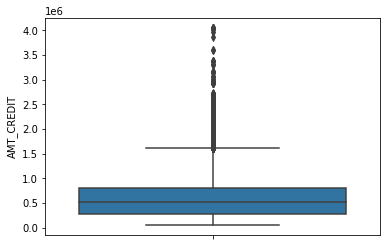

In [46]:
##check for outlier in AMT_CREDIT column
df_appln_data_4.AMT_CREDIT.mean()
sns.boxplot(y=df_appln_data_4['AMT_CREDIT'])  

In [47]:
###observe statistical values of AMT_CREDIT column
df_appln_data_4['AMT_CREDIT'].describe()

count    3.075060e+05
mean     5.990199e+05
std      4.024885e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [48]:
##Remove the outliers
df_appln_data_4=df_appln_data_4[df_appln_data_4['AMT_CREDIT'] <= 2.7*pow(10,6)]

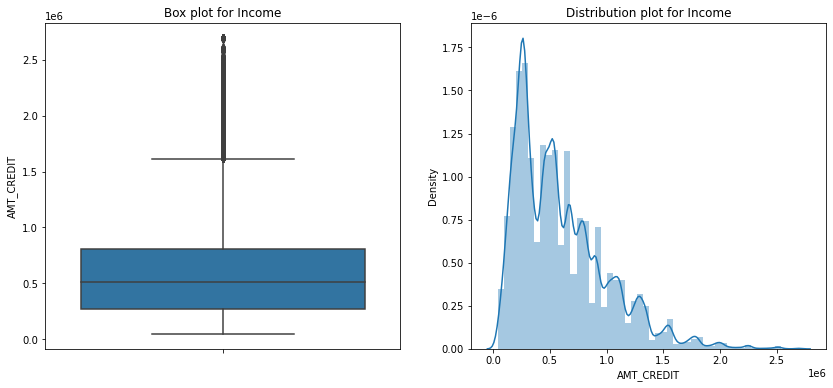

In [49]:
##plot box plot of AMT_CREDIT column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot( y=df_appln_data_4['AMT_CREDIT'],ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.distplot(df_appln_data_4.AMT_CREDIT,ax=ax[1])
ax[1].set_title('Distribution plot for Income')
plt.show()

- Inference 1: In the box plot qurtile is present at 0.3M
- Inference 2: Majority value lies between 0.1 to 1.0

In [50]:
##check for outlier in AMT_ANNUITY column
df_appln_data_4.AMT_ANNUITY.describe()
#sns.boxplot(y=df_appln_data_4['AMT_ANNUITY'])  ## outliers are not present but data distribution is not continuous

count    307450.000000
mean      27097.221384
std       14459.192842
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      230161.500000
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:ylabel='AMT_ANNUITY'>

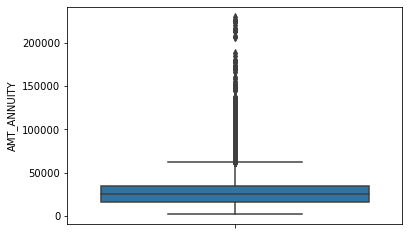

In [51]:
##box plot to check ouliers
sns.boxplot(y=df_appln_data_4['AMT_ANNUITY'])

#### Ouliers are present in AMT_ANNUITY column, we will remove these ouliers for better analysis

In [52]:
##Remove the outliers
df_appln_data_4=df_appln_data_4[df_appln_data_4['AMT_ANNUITY'] <= 200000]

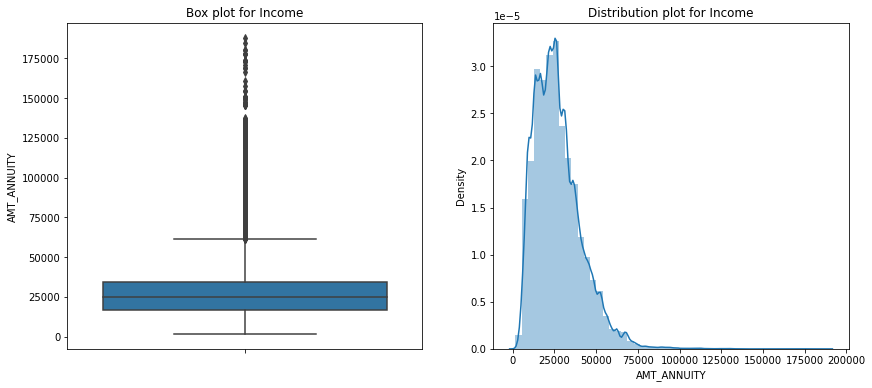

In [53]:
##plot box plot of AMT_ANNUITY column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot( y=df_appln_data_4['AMT_ANNUITY'],ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.distplot(df_appln_data_4.AMT_ANNUITY,ax=ax[1])
ax[1].set_title('Distribution plot for Income')
plt.show()

- Inference 1: In the box plot qurtile is present at 25000
- Inference 2: Majority value lies between 0 to 70000

<AxesSubplot:ylabel='YEARS_BIRTH'>

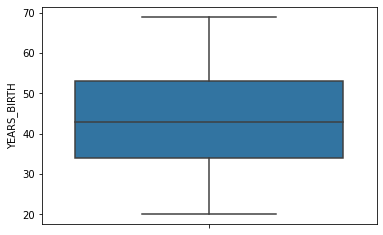

In [54]:
sns.boxplot(y=df_appln_data_4['YEARS_BIRTH']) 

- Inference 1: Outliers are not present in the YEARS_BIRTH column 

<AxesSubplot:ylabel='YEARS_EMPLOYED'>

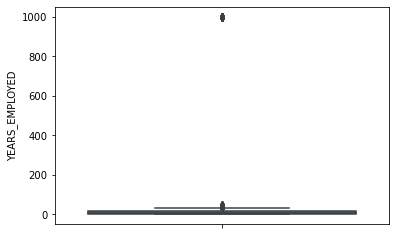

In [55]:
##plot values of YEARS_EMPLOYED column
sns.boxplot(y=df_appln_data_4['YEARS_EMPLOYED']) 

#### Outliers are present in the YEARS_EMPLOYED columns and we will handle this outlier by removing the rows 

In [56]:
##Remove the outliers
df_appln_data_4=df_appln_data_4[df_appln_data_4['YEARS_EMPLOYED'] <= 800]

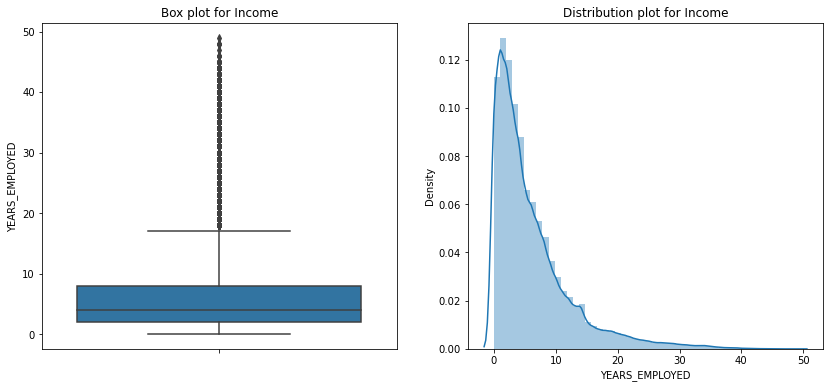

In [57]:
##plot box plot of YEARS_EMPLOYED column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot( y=df_appln_data_4['YEARS_EMPLOYED'],ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.distplot(df_appln_data_4.YEARS_EMPLOYED,ax=ax[1])
ax[1].set_title('Distribution plot for Income')
plt.show()

- Inference 1: In the box plot qurtile is present at 4 years of employment
- Inference 2: bolde 75% people employed years/experience lies between 0-18
- Inference 2: Majority value lies between 0 to 12 years

<AxesSubplot:ylabel='DAYS_REGISTRATION'>

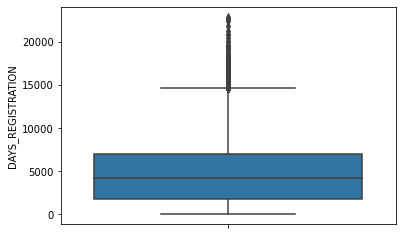

In [58]:
## check outliers for DAYS_REGISTRATION column
df_appln_data_4.DAYS_REGISTRATION
sns.boxplot(y=df_appln_data_4['DAYS_REGISTRATION'])

In [59]:
##check outliers for cnt_children column
df_appln_data_4.CNT_CHILDREN.value_counts()

0     161851
1      59678
2      26357
3       3626
4        413
5         81
6         19
7          7
19         2
14         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

<AxesSubplot:ylabel='CNT_CHILDREN'>

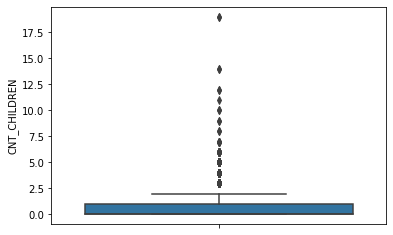

In [60]:
##plot graph to check outliers
sns.boxplot(y=df_appln_data_4['CNT_CHILDREN'])

#### Outliers are present in CNT_CHILDREN column 

In [61]:
##Remove the outliers
df_appln_data_4=df_appln_data_4[df_appln_data_4['CNT_CHILDREN'] <= 6]

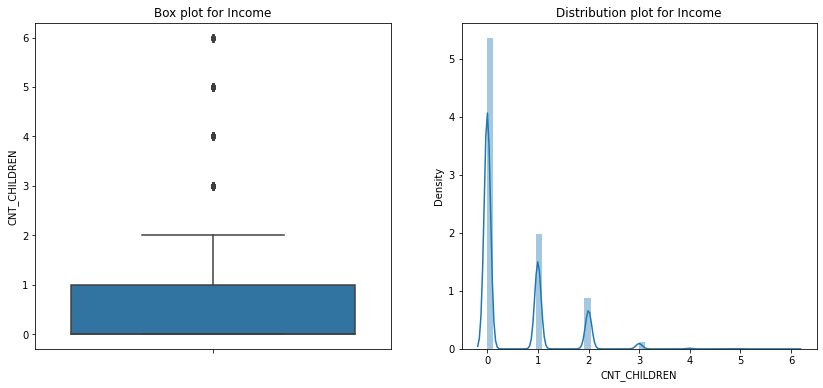

In [62]:
##plot box plot of CNT_CHILDREN column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot( y=df_appln_data_4['CNT_CHILDREN'],ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.distplot(df_appln_data_4.CNT_CHILDREN,ax=ax[1])
ax[1].set_title('Distribution plot for Income')
plt.show()

- Inference 1: Majority value lies between 0 to 2 years

### 	Check imbalance percentage 

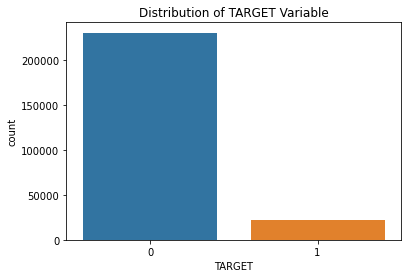

In [63]:
####plot to caheck imblance percentage of target column
sns.countplot(df_appln_data_4['TARGET'])
plt.title("Distribution of TARGET Variable")
plt.show()

- Inference 1 :percentage of customer beigh defaulter is imbalanced as compare to not being defaulter
- Inference 2: The gap between the perecentage of taget values are significant

In [64]:
##check the value counts 
df_appln_data_4['TARGET'].value_counts(normalize= 2)

0    0.91339
1    0.08661
Name: TARGET, dtype: float64

#### For correlation identify categorical columns and convert datatype of that column to category 

In [65]:
##get unique value count of all columns
df_appln_data_4.nunique().sort_values()

TARGET                      2
NAME_CONTRACT_TYPE          2
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
FLAG_MOBIL                  2
NAME_EDUCATION_TYPE         5
NAME_HOUSING_TYPE           6
NAME_FAMILY_STATUS          6
CNT_CHILDREN                7
NAME_INCOME_TYPE            7
CNT_FAM_MEMBERS             8
OCCUPATION_TYPE            19
ORGANIZATION_TYPE          34
YEARS_EMPLOYED             50
YEARS_BIRTH                50
EXT_SOURCE_3              810
AMT_GOODS_PRICE           882
AMT_INCOME_TOTAL         2235
AMT_CREDIT               5310
DAYS_ID_PUBLISH          6140
AMT_ANNUITY             13152
DAYS_REGISTRATION       14418
EXT_SOURCE_2           110535
SK_ID_CURR             252025
dtype: int64

In [66]:
###### get column names to list to apply for loop over a list
column_names=df_appln_data_4.columns.to_list()
column_names

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED']

In [67]:
###identify the categorical column names according to nunique() function
cat_column_names=['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS',
 'ORGANIZATION_TYPE',]
### according to observation these are categorical columns
###change the data type of all these columns to category 
for i in range (0,len(column_names)):
    if column_names[i] in cat_column_names:
        col_name=column_names[i]
        df_appln_data_4[col_name]=df_appln_data_4[col_name].astype('category')      
df_appln_data_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252025 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   SK_ID_CURR           252025 non-null  int64   
 1   TARGET               252025 non-null  category
 2   NAME_CONTRACT_TYPE   252025 non-null  category
 3   CODE_GENDER          252025 non-null  category
 4   FLAG_OWN_CAR         252025 non-null  category
 5   FLAG_OWN_REALTY      252025 non-null  category
 6   CNT_CHILDREN         252025 non-null  category
 7   AMT_INCOME_TOTAL     252025 non-null  float64 
 8   AMT_CREDIT           252025 non-null  float64 
 9   AMT_ANNUITY          252025 non-null  float64 
 10  AMT_GOODS_PRICE      251769 non-null  float64 
 11  NAME_INCOME_TYPE     252025 non-null  category
 12  NAME_EDUCATION_TYPE  252025 non-null  category
 13  NAME_FAMILY_STATUS   252025 non-null  category
 14  NAME_HOUSING_TYPE    252025 non-null  category
 15  

#### Now we will cerate two different dataframe for target value =1 and target value =0 to find correlation between numeric values

In [68]:
##create new dataframe for target=1
df_appln_data_target_1=df_appln_data_4[df_appln_data_4['TARGET']==1]
df_appln_data_target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,3648,2120,1,Laborers,1.0,Business Entity,0.262949,0.139376,25,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,6573,1827,1,Cooking staff,1.0,Business Entity,0.548477,0.190706,51,7
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1182,1029,1,Laborers,2.0,Business Entity,0.306841,0.320163,47,3
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,45,4409,1,Sales staff,2.0,Self-employed,0.674203,0.399676,36,9
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Commercial associate,Incomplete higher,Single / not married,With parents,4802,1038,1,Unknown,1.0,Industry,0.432340,0.077499,27,5


In [69]:
##validate the shape
df_appln_data_target_1.shape

(21828, 25)

In [70]:
##create new dataframe for target=1
df_appln_data_target_0=df_appln_data_4[df_appln_data_4['TARGET']==0]
df_appln_data_target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,1186,291,1,Core staff,2.0,School,0.622246,NaN,45,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,4260,2531,1,Laborers,1.0,Government,0.555912,0.729567,52,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,9833,2437,1,Laborers,2.0,Business Entity,0.650442,NaN,52,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,4311,3458,1,Core staff,1.0,Religion,0.322738,NaN,54,8
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,4970,477,1,Laborers,2.0,Other,0.354225,0.621226,46,4


In [71]:
##validate the shape
df_appln_data_target_0.shape

(230197, 25)

## 6. Correlation

###  Find correlation for all numerical variable

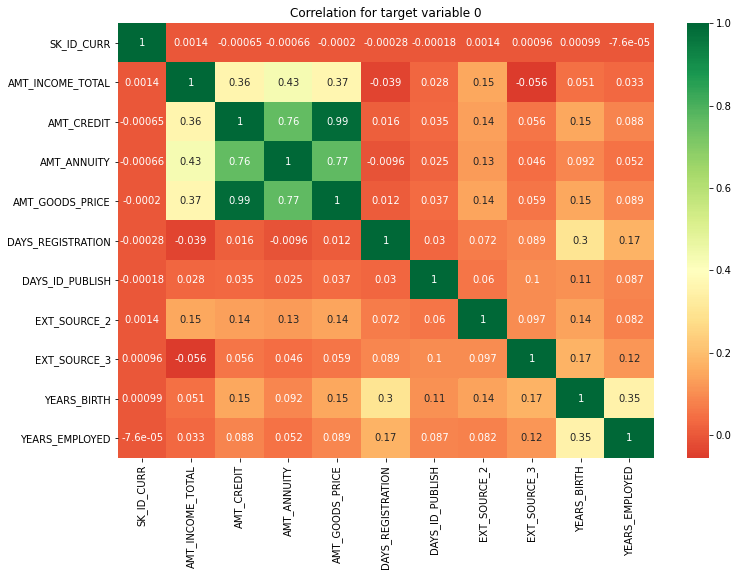

In [72]:
###plot heatmap to find correlation between all numerical variables when target variable is 0
plt.figure(figsize=(12,8)) 
sns.heatmap(df_appln_data_target_0.corr(), annot=True , cmap="RdYlGn",center=0.4)
plt.title('Correlation for target variable 0')
plt.show()

- Inference 1 : AMT_GOODS_PRICE and  AMT_CREDIT have heighest correlation around 0.99
- Inference 2 : AMT_GOODS_PRICE and AMT_ANNUITY is also showing good correlation
- Inference 3 : EXT_SOURCE_2 is having negative correlation with AMT_INCOME_TOTAL

In [73]:
###we will find top 10 correlations of numerical variables
corr_matrix_df_target_0 = df_appln_data_target_0.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

corr_target_0 = (corr_matrix_df_target_0.where(np.triu(np.ones(corr_matrix_df_target_0.shape), k=1).astype(np.bool))
                  .unstack()
                  .sort_values(ascending=False))
corr_target_0.head(10)

AMT_GOODS_PRICE  AMT_CREDIT           0.986629
                 AMT_ANNUITY          0.768321
AMT_ANNUITY      AMT_CREDIT           0.764025
                 AMT_INCOME_TOTAL     0.431308
AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.367258
AMT_CREDIT       AMT_INCOME_TOTAL     0.360005
YEARS_EMPLOYED   YEARS_BIRTH          0.351901
YEARS_BIRTH      DAYS_REGISTRATION    0.298873
                 EXT_SOURCE_3         0.174227
YEARS_EMPLOYED   DAYS_REGISTRATION    0.172056
dtype: float64

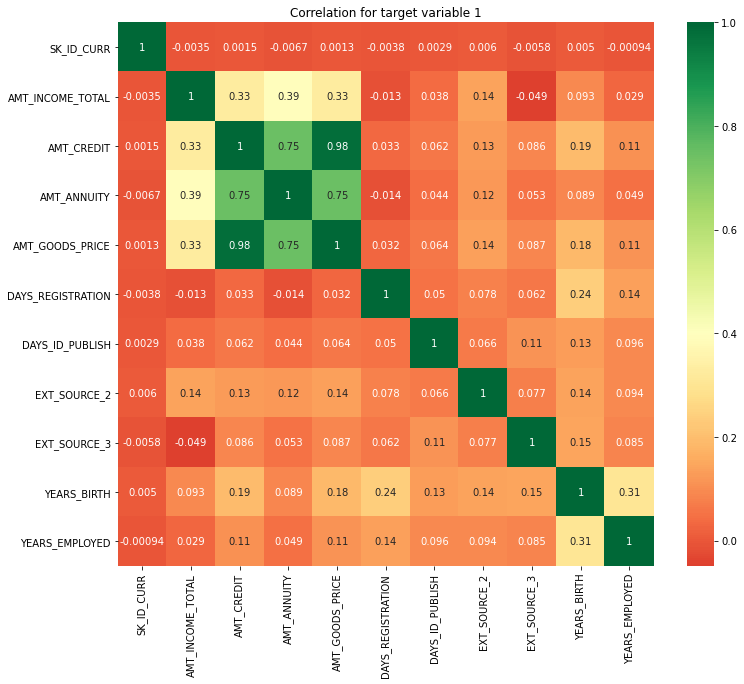

In [74]:
###plot heatmap to find correlation between all numerical variables when target variable is 1
plt.figure(figsize=(12,10)) 
sns.heatmap(df_appln_data_target_1.corr(), annot=True, cmap="RdYlGn",center=0.4)
plt.title('Correlation for target variable 1')
plt.show()

- Inference 1 : AMT_CREDIT and AMT_GOODS_PRICE have heighest correlation around 0.98
- Inference 2 : Top 10 correlations are mentioned below 

In [75]:
###we will find top 10 correlations of numerical variables
corr_matrix_df_target_1 = df_appln_data_target_1.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

corr_target_1 = (corr_matrix_df_target_1.where(np.triu(np.ones(corr_matrix_df_target_1.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
corr_target_1.head(10)

AMT_CREDIT         AMT_GOODS_PRICE    0.982660
AMT_ANNUITY        AMT_GOODS_PRICE    0.748125
AMT_CREDIT         AMT_ANNUITY        0.747480
AMT_INCOME_TOTAL   AMT_ANNUITY        0.392357
                   AMT_GOODS_PRICE    0.330456
                   AMT_CREDIT         0.326355
YEARS_BIRTH        YEARS_EMPLOYED     0.306644
DAYS_REGISTRATION  YEARS_BIRTH        0.241166
AMT_CREDIT         YEARS_BIRTH        0.188858
AMT_GOODS_PRICE    YEARS_BIRTH        0.184894
dtype: float64

## 7. Univariate Analysuis

#### Univariate analysis for Numerical variables

##### Ditribution for YEARS_BIRTH Column

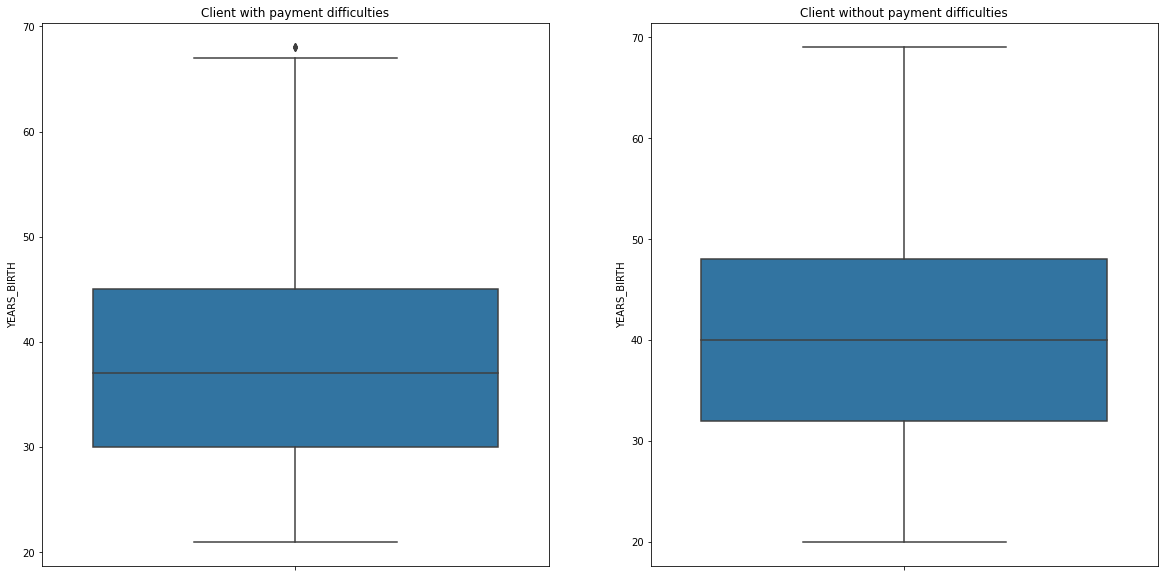

In [76]:
###plot graph for Days_birth column for analysis
plt.figure(figsize=(20,10)) 

plt.subplot(1,2,1)
ax = sns.boxplot(y=df_appln_data_target_1['YEARS_BIRTH'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=df_appln_data_target_0['YEARS_BIRTH'])
plt.title('Client without payment difficulties')
plt.show()

#### Inference : 
- clients between age group of 30-48 are facing payment difficulties
- clients are not facing any payment difficulities between age group of 33-54

##### Ditribution for YEARS_EMPLOYED Column

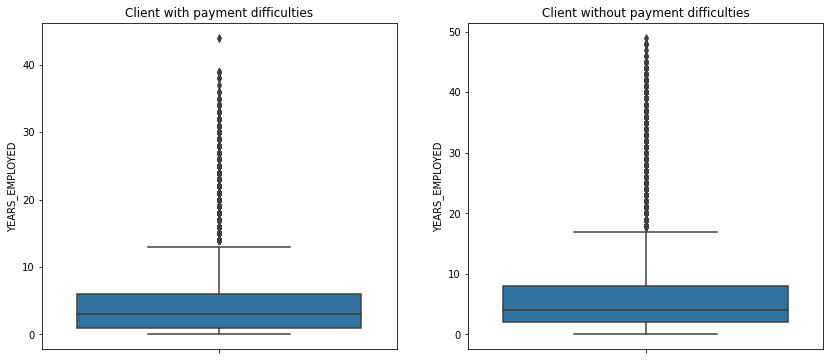

In [77]:
###plot graph for Days_birth column for analysis
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(y=df_appln_data_target_1['YEARS_EMPLOYED'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=df_appln_data_target_0['YEARS_EMPLOYED'])
plt.title('Client without payment difficulties')
plt.show()

#### Inferences :
- Outliers are Present for the clients with payment difficuities
- Range of Employed years for clients without payment difficulities is high than clients with payment difficulities

##### Ditribution for AMT_INCOME_TOTAL Column

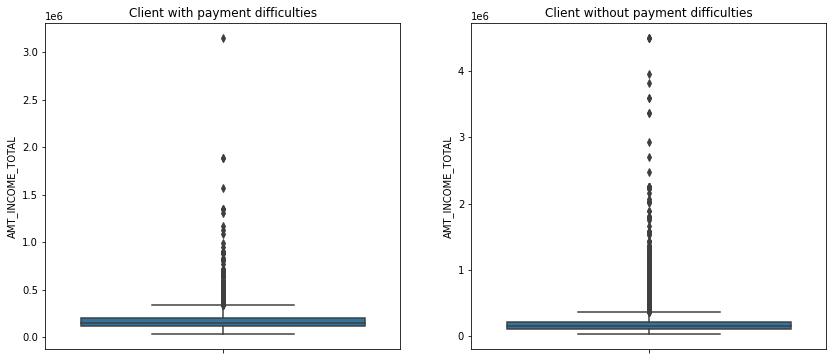

In [78]:
###plot graph for AMT_INCOME_TOTAL column for analysis
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(y=df_appln_data_target_1['AMT_INCOME_TOTAL'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=df_appln_data_target_0['AMT_INCOME_TOTAL'])
plt.title('Client without payment difficulties')
plt.show()

#### Inferences :
- More Ouliers present in Clients without payment difficulities
- Average Income total is higher for the Clients without payment difficulities than Clients with payment difficulities

##### Ditribution for AMT_CREDIT Column

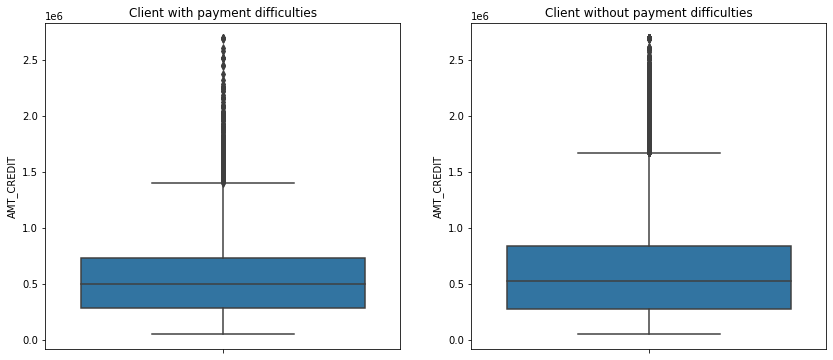

In [79]:
###plot graph for AMT_CREDIT column for analysis
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(y=df_appln_data_target_1['AMT_CREDIT'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=df_appln_data_target_0['AMT_CREDIT'])
plt.title('Client without payment difficulties')
plt.show()

#### Inferences :
- Qurtile for Client without payment difficulities is slightly greater than Client with payment difficulities
- More outliers are present Clients with payment difficulities as compared with client without payment difficulities

##### Ditribution for AMT_GOODS_PRICE Column

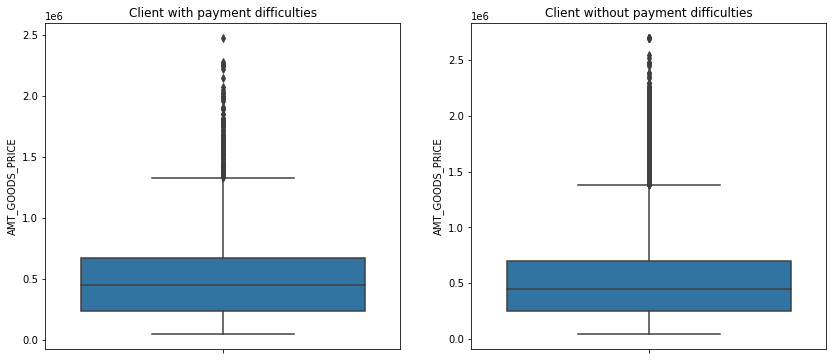

In [80]:
###plot graph for AMT_GOODS_PRICE column for analysis
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(y=df_appln_data_target_1['AMT_GOODS_PRICE'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=df_appln_data_target_0['AMT_GOODS_PRICE'])
plt.title('Client without payment difficulties')
plt.show()

#### Inferences:
- AMT_GOODS_PRICE if almost same for Clients with payment dfficulities and clients without payment difficulities

##### Ditribution for DAYS_REGISTRATION Column

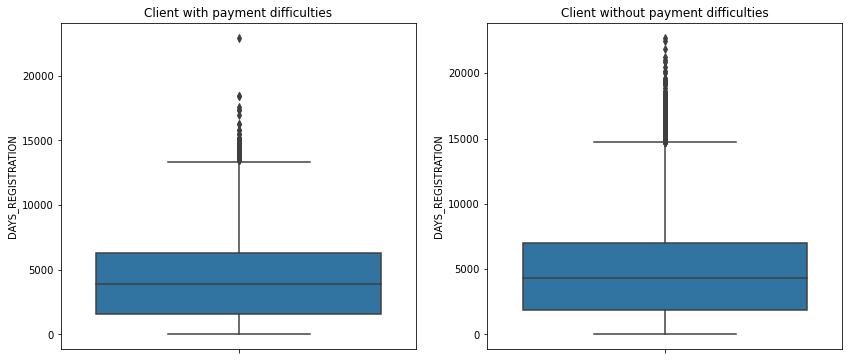

In [81]:
###plot graph for DAYS_REGISTRATION column for analysis
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(y=df_appln_data_target_1['DAYS_REGISTRATION'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=df_appln_data_target_0['DAYS_REGISTRATION'])
plt.title('Client without payment difficulties')
plt.show()

#### Inferences:
-  Outliers are present in the Clients with payment difficulities

#### Univariate analysis for categorical columns 

#### We will plot all the following categorical columns for analysis
- NAME_CONTRACT_TYPE
- CODE_GENDER
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- ORGANIZATION_TYPE


##### Distribution for NAME_CONTRACT_TYPE, CODE_GENDER, Owning Cars and FLAG_OWN_REALTY

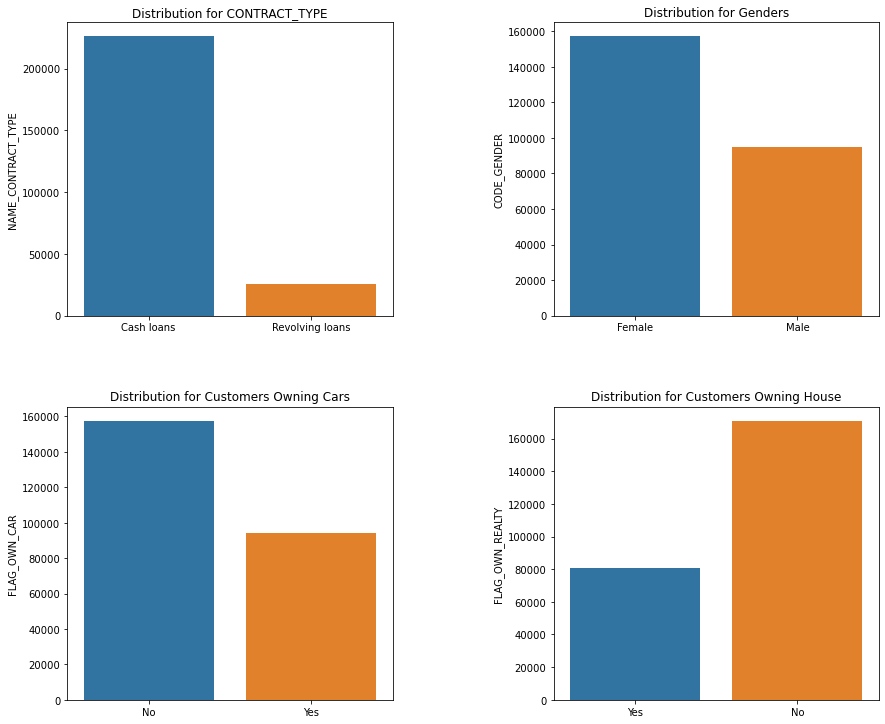

In [82]:
# plot NAME_CONTRACT_TYPE, CODE_GENDER, Owning Cars and FLAG_OWN_REALTY columns for analysis
 
fig, ax = plt.subplots(2, 2, figsize=(12,10))
# Making a plot with 2 subplots

contract_type = df_appln_data_4.NAME_CONTRACT_TYPE.value_counts()
code_genders = df_appln_data_4.CODE_GENDER.value_counts()
owns_cars_flag = df_appln_data_4.FLAG_OWN_CAR.value_counts()
own_reality_flag = df_appln_data_4.FLAG_OWN_REALTY.value_counts()

fig.tight_layout(h_pad=7,w_pad=13)
sns.barplot(x=contract_type.index, y=contract_type, ax=ax[0][0])
ax[0][0].set_title("Distribution for CONTRACT_TYPE", fontsize=12)
ax[0][0].set_xticklabels(['Cash loans','Revolving loans'])
sns.barplot(x=code_genders.index, y=code_genders, ax=ax[0][1])
ax[0][1].set_title("Distribution for Genders", fontsize=12)
ax[0][1].set_xticklabels(['Female','Male'])
sns.barplot(x=owns_cars_flag.index, y=owns_cars_flag, ax=ax[1][0])
ax[1][0].set_title("Distribution for Customers Owning Cars", fontsize=12)
ax[1][0].set_xticklabels(['No','Yes'])
sns.barplot(x=own_reality_flag.index, y=own_reality_flag, ax=ax[1][1])
ax[1][1].set_title("Distribution for Customers Owning House", fontsize=12)
ax[1][1].set_xticklabels(['Yes','No'])

plt.show()

#### Inferences for above distribution
- Number of Cash loan is more than Revolving loans it means more clients are opting for cash loans
- Number of female clients is more than male clients
- Clients who owns a car is less than clients who does not owns a car
- Clients who wons reality is around 50 % less than clients who does not owns a reality

##### Distribution of NAME_INCOME_TYPE, NAME_EDUCATION_TYPE

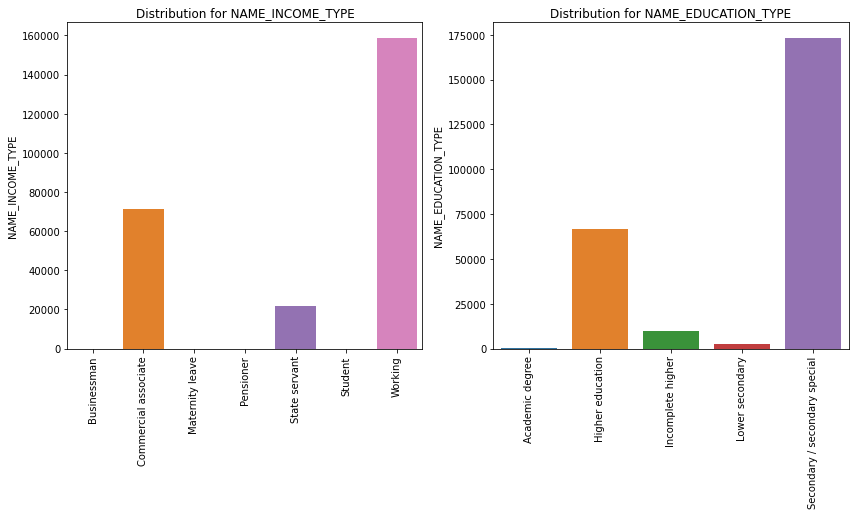

In [83]:
###plot for NAME_INCOME_TYPE and NAME_EDUCATION_TYPE
income_type = df_appln_data_4.NAME_INCOME_TYPE.value_counts()
education_type = df_appln_data_4.NAME_EDUCATION_TYPE.value_counts()

plt.figure(figsize=(14,6)) 


plt.subplot(1,2,1)
ax = sns.barplot(x=income_type.index, y=income_type,)
plt.title("Distribution for NAME_INCOME_TYPE")
plt.xticks(rotation=90)

plt.subplot(1,2,2)                  
ax = sns.barplot(x=education_type.index, y=education_type)
plt.title("Distribution for NAME_EDUCATION_TYPE")
plt.xticks(rotation=90)
plt.show()


#### Infrence :
- Clients with income type category Businessman, Maternity leave , Pentioner and student is very less. We can say that
- Clients with income type Working is heighest in the data
- Few clients are present with education type Academic degree and lower Secondary
- Clients with education type secondary / secondary special is heighest in data

#### Distribution of NAME_FAMILY_STATUS ,NAME_HOUSING_TYPE

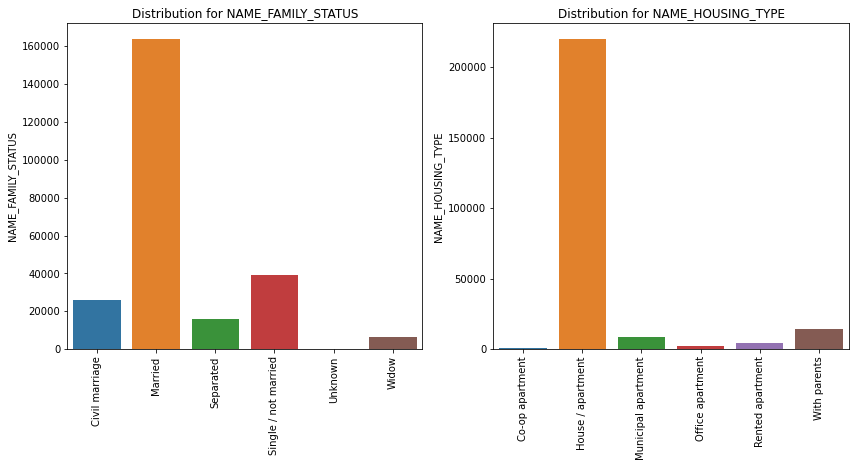

In [84]:
##plot for NAME_FAMILY_STATUS and NAME_HOUSING_TYPE for analysis
family_status = df_appln_data_4.NAME_FAMILY_STATUS.value_counts()
houcing_type = df_appln_data_4.NAME_HOUSING_TYPE.value_counts()

plt.figure(figsize=(14,6)) 


plt.subplot(1,2,1)
ax = sns.barplot(x=family_status.index, y=family_status)
plt.title("Distribution for NAME_FAMILY_STATUS")
plt.xticks(rotation=90)

plt.subplot(1,2,2)                  
ax = sns.barplot(x=houcing_type.index, y=houcing_type)
plt.title("Distribution for NAME_HOUSING_TYPE")
plt.xticks(rotation=90)
plt.show()

#### Inferences :
- Huge number of married client are present in data.
- Few number of Widow clients is available
- Clients with housing type Houce/ Appartment is very high

##### Distribution of ORGANIZATION_TYPE 

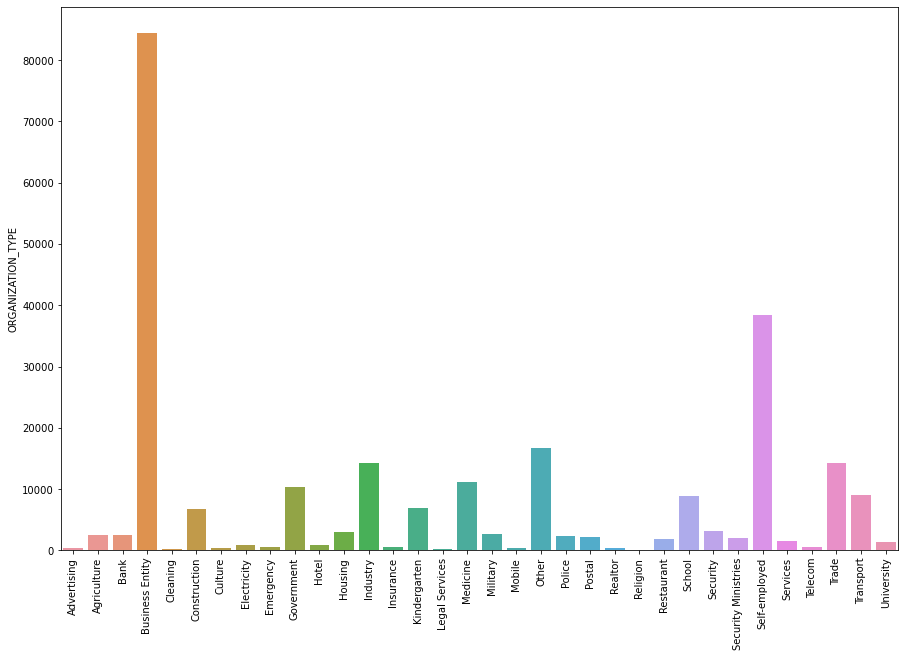

In [85]:
## plot ORGANIZATION_TYPE column for analysis 
plt.figure(figsize=[15,10])
organization_type = df_appln_data_4.ORGANIZATION_TYPE.value_counts()
sns.barplot(x=organization_type.index, y=organization_type)
#plt.set_title("Distribution for ORGANIZATION_TYPE", fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### Inferences :
- Number of clients with organization type Business Entity is huge
- Very less clients available in data with organization type Advertising , Culture, Religion, Mobile, Legel Services
- Population of clients with category Agriculture, Bank , Polive , Postal is alomst same

### 8. Bivariate Analysis

We will perform two types of Bivariate analysis
- Bivariate Analysis of Numerical - Numerical Variables 
- Bivariate Analysis of Numerical- Categorical Variables 
- Bivariate Analysis of Categorical- Categorical Variables

We have alredy created two dataframes 
- 1) Client without payment difficulties : Target value =0
- 2) Client with payment difficulties : Target value =1

Now we will analyse Bivariate Analysis on above two mentioned dataframes seperatoly.

#### Numerical Vs Numerical Variables

In [86]:
###get all numerical columns in a list
numerical_columns= ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                    'YEARS_BIRTH']
numerical_columns

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'YEARS_BIRTH']

<Figure size 1152x720 with 0 Axes>

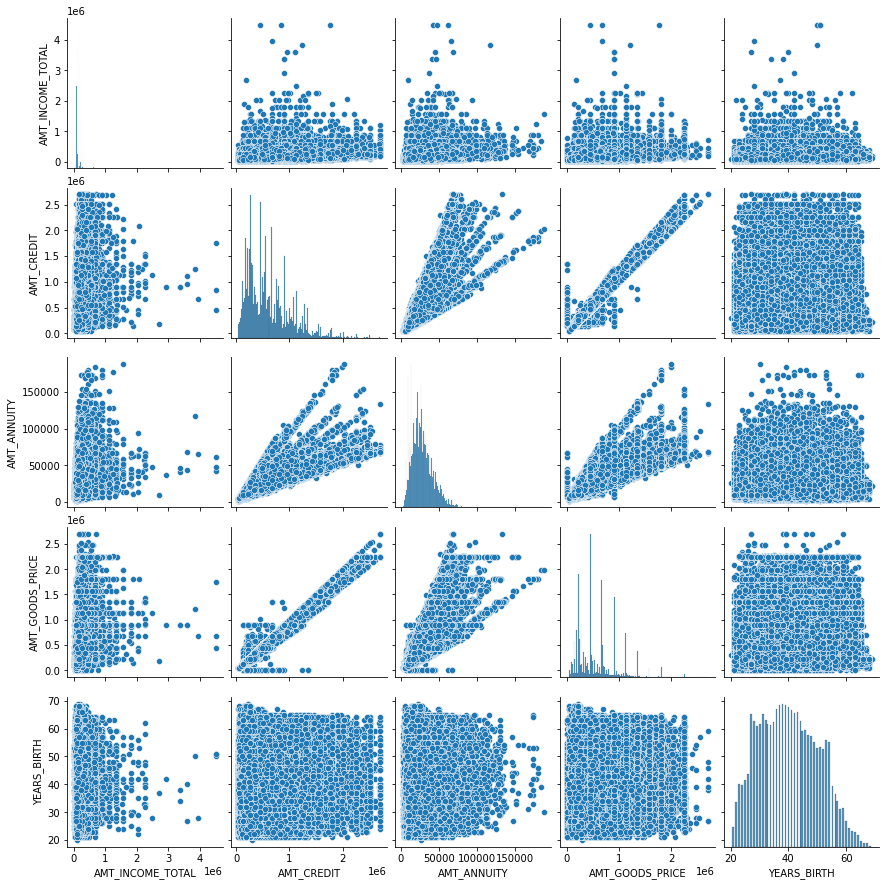

In [87]:
### pair plot of all numerical columns that mentioned above
##pairplott for target varible 0
plt.figure(figsize=[16,10])
plot_pair=df_appln_data_target_0[numerical_columns].fillna(0)
sns.pairplot(plot_pair)
plt.show()

#### Inference:
- There is not such correlation can be observed from the above pairplot 
- Linear correlation present between AMT_GOODS_PRICE vs AMT_CREDIT , AMT_GOODS_PRICE vs AMT_ANNUITY

<Figure size 1152x720 with 0 Axes>

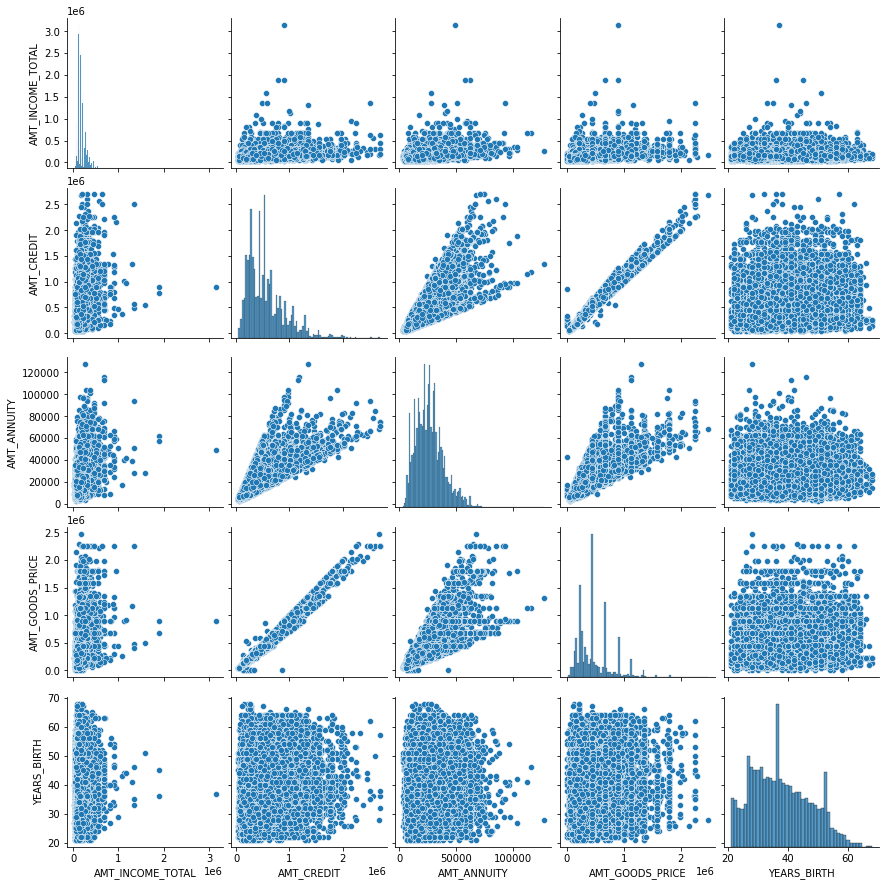

In [88]:
### pair plot of all numerical columns that mentioned above
###Pairplot for target varible 1
plt.figure(figsize=[16,10])
plot_pair=df_appln_data_target_1[numerical_columns].fillna(0)
sns.pairplot(plot_pair)
plt.show()

#### Inference:
- There is not such correlation can be observed from the above pairplot
- Linear correlation present between AMT_GOODS_PRICE vs AMT_CREDIT , AMT_GOODS_PRICE vs AMT_ANNUITY

#### Numerical- Categorical Variables

In [89]:
### function to plot boxplot of Numerical vs Categorical variable
def box_plot_numerical_categorical(num_var,cat_var):
    plt.figure(figsize=(20,8)) 

    plt.subplot(1,2,1)
    ax = sns.boxplot(data=df_appln_data_target_0,y=num_var,x=cat_var)
    plt.title('Clients without payment difficulties')
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    ax = sns.boxplot(data=df_appln_data_target_1,y=num_var,x=cat_var)
    plt.title('Clients with payment difficulties')
    plt.xticks(rotation=90)
    plt.show()

##### Distributions for 'AMT_CREDIT' vs 'NAME_CONTRACT_TYPE'

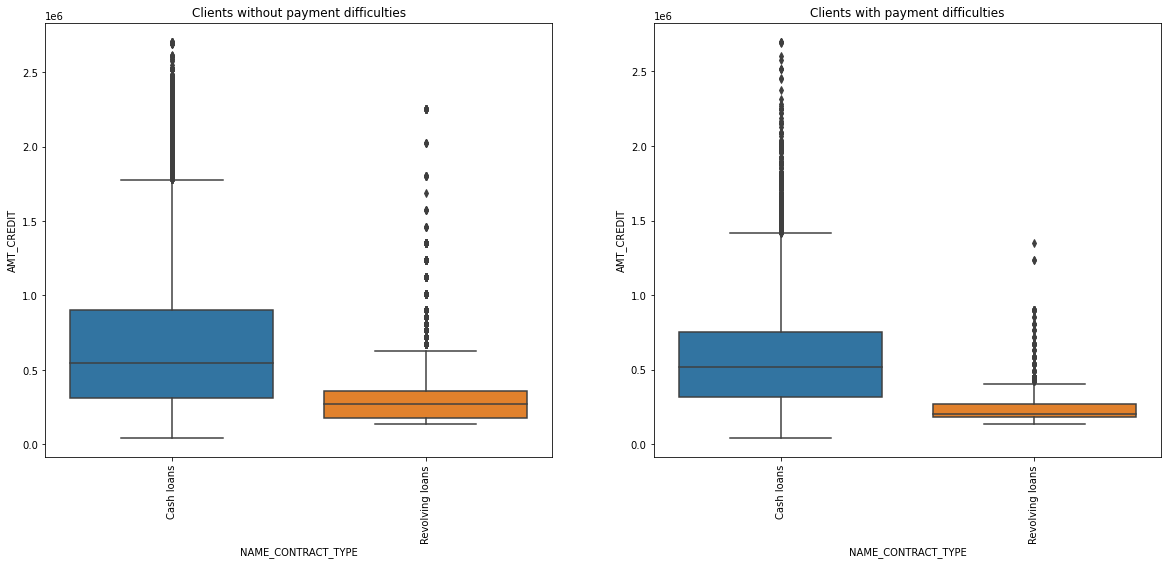

In [90]:
###plot the Distributions for 'AMT_CREDIT' vs 'NAME_CONTRACT_TYPE'
box_plot_numerical_categorical('AMT_CREDIT','NAME_CONTRACT_TYPE')

#### Inferences from above Distributions for 'AMT_CREDIT' vs 'NAME_CONTRACT_TYPE'
- Median for  Customer without payment difficulties and Customer with payment difficulties is approximately same
- There is huge difference between 75th quartile of Customer without payment difficulties and Customer with payment difficulties
- There are some outliers resent in Customer with payment difficulties
- Number of clients is very high for cash loans than revolving loan 

##### Distributions for 'AMT_CREDIT' vs 'NAME_EDUCATION_TYPE'

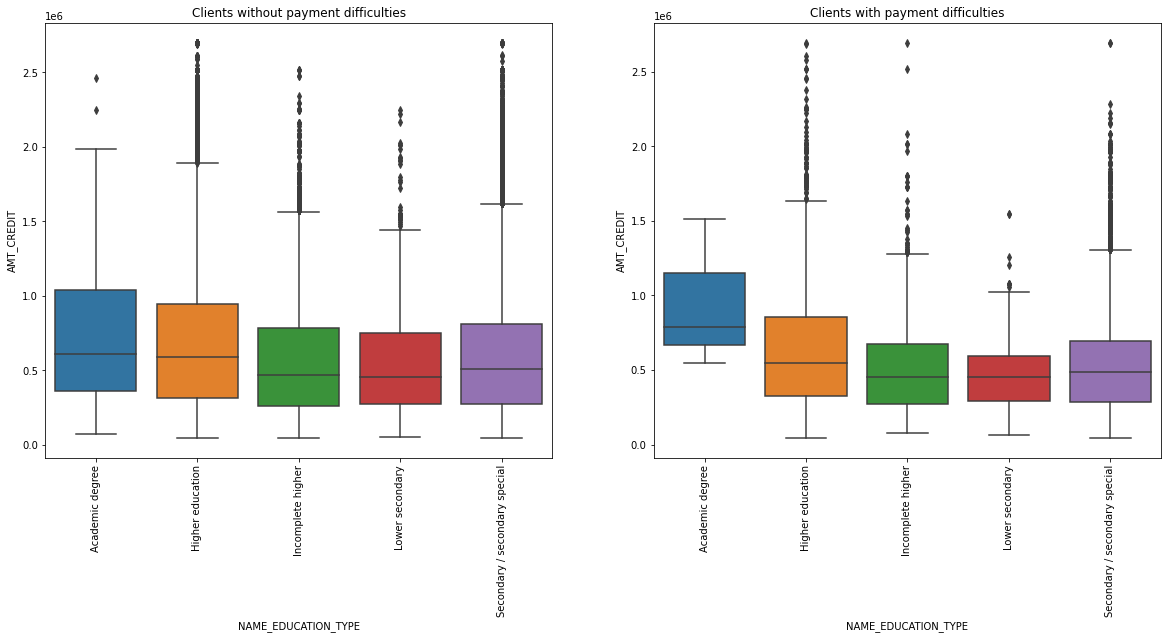

In [91]:
###plot the Distributions for 'AMT_CREDIT' vs 'NAME_EDUCATION_TYPE'
box_plot_numerical_categorical('AMT_CREDIT','NAME_EDUCATION_TYPE')

#### Inferences from above Distributions for 'AMT_CREDIT' vs 'NAME_EDUCATION_TYPE'
- Median for Academic degree is heighest and Incomplete higher is lowest for both Customer without payment difficulties and Customer with payment difficulties
- For Customer without payment difficulties , median is approximatey same for each education type
- Very less outliers present in Education type Academic degree for both Customer without payment difficulties and Customer with payment difficulties
- Number of outliers are more for Customer without payment difficulties as compared to Customer with payment difficulties

##### Distributions for 'AMT_CREDIT' vs 'NAME_INCOME_TYPE'

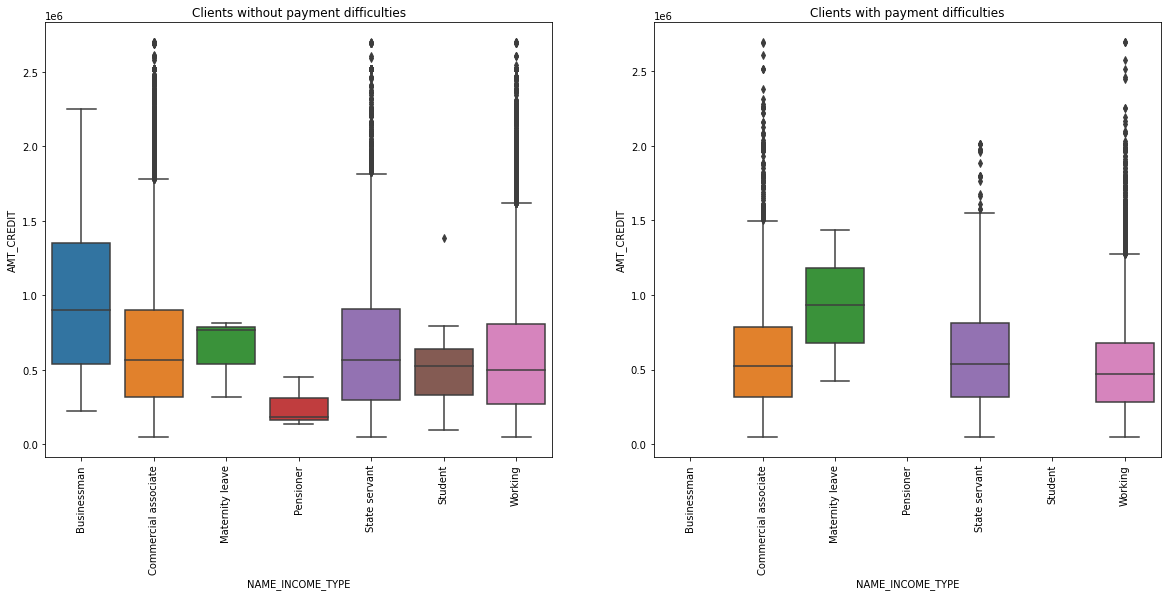

In [92]:
###plot the Distributions for 'AMT_CREDIT' vs 'NAME_INCOME_TYPE'
box_plot_numerical_categorical('AMT_CREDIT','NAME_INCOME_TYPE')

#### Inferences from above Distributions for 'AMT_CREDIT' vs 'NAME_INCOME_TYPE'
- Businessman, Pensioner and Students are not facing any payment difficulities 
- Number of outliers are more for Customer without payment difficulties as compared to Customer with payment difficulties
- Median is heighest for Businessman for Customer without payment difficulties
- Median is heighest for Maternity leave for Customer with payment difficulties

##### Distributions for 'AMT_CREDIT' vs 'OCCUPATION_TYPE'

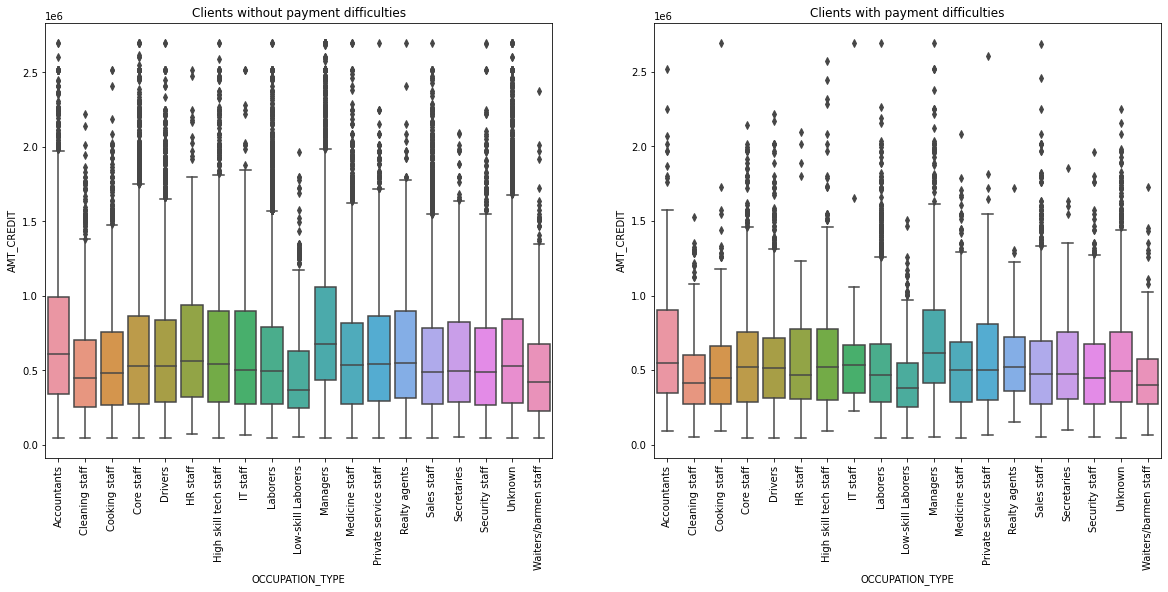

In [93]:
###plot the Distributions for 'AMT_CREDIT' vs 'OCCUPATION_TYPE'
box_plot_numerical_categorical('AMT_CREDIT','OCCUPATION_TYPE')

#### Inferences from above Distributions for 'AMT_CREDIT' vs 'OCCUPATION_TYPE'
- Range of clients is more for Customer without payment difficulties as compared to Customer with payment difficulties
- Number of outliers is also more for Customer without payment difficulties as compared to Customer with payment difficulties
- Median of occupation type Managers is heighest for both Customer without payment difficulties and Customer with payment difficulties

##### Distributions for 'AMT_INCOME_TOTAL' vs 'OCCUPATION_TYPE'

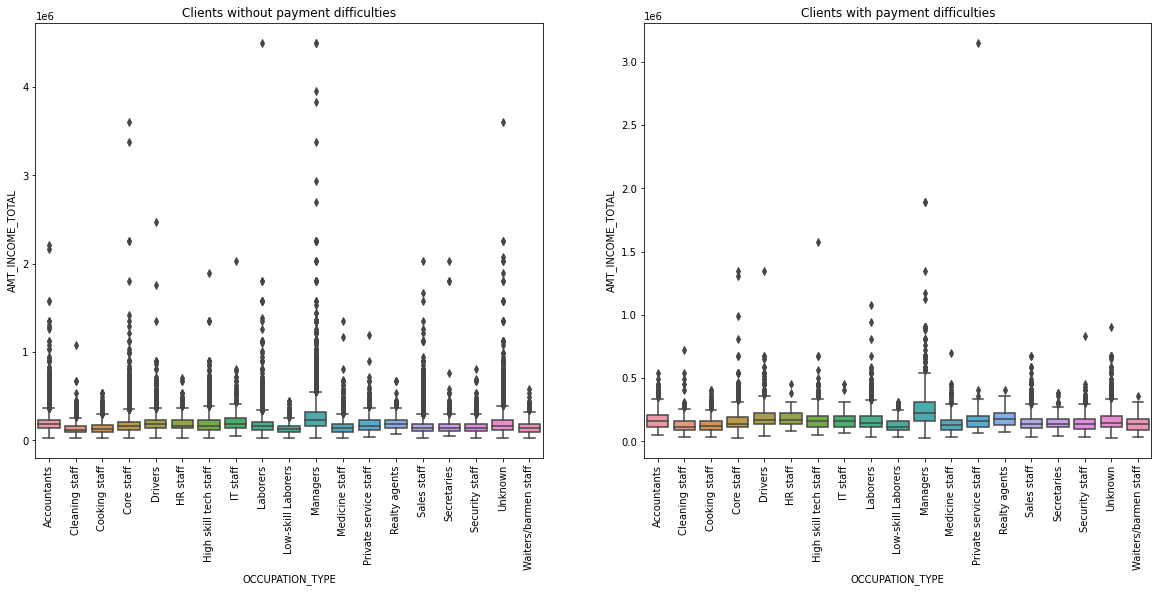

In [94]:
#### Distributions for 'AMT_INCOME_TOTAL' vs 'OCCUPATION_TYPE'
box_plot_numerical_categorical('AMT_INCOME_TOTAL','OCCUPATION_TYPE')

#### Inferences from above Distributions for 'AMT_INCOME_TOTAL' vs 'OCCUPATION_TYPE'
- Range of clients is more for Customer without payment difficulties as compared to Customer with payment difficulties
- Occupation type Managers have heighest income total
- Cleaning staff, cooking staff ,Low skill laboreres have lowest income total
- Number of outliers is also more for Customer without payment difficulties as compared to Customer with payment difficulties

##### Distributions for 'AMT_INCOME_TOTAL' vs 'CODE_GENDER'

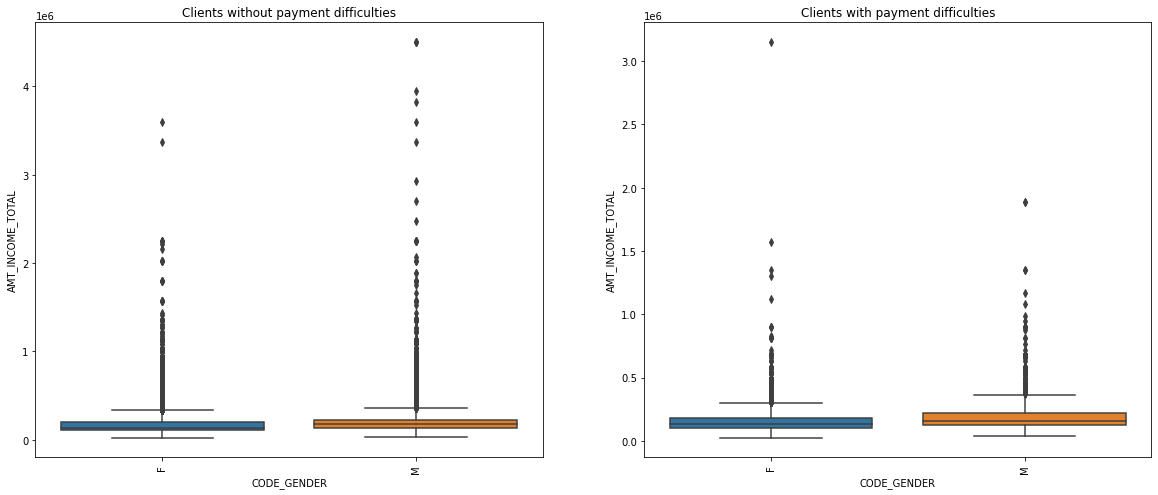

In [95]:
#### Distributions for 'AMT_INCOME_TOTAL' vs 'CODE_GENDER''
box_plot_numerical_categorical('AMT_INCOME_TOTAL','CODE_GENDER')

#### Inferences from above Distributions for 'AMT_INCOME_TOTAL' vs 'CODE_GENDER'
- Range of clients is more for Customer without payment difficulties as compared to Customer with payment difficulties
- Number of outliers are more for male gender 
- Median of income total is more of male gender as compared with female gender

##### Distributions for 'AMT_INCOME_TOTAL' vs 'NAME_EDUCATION_TYPE'

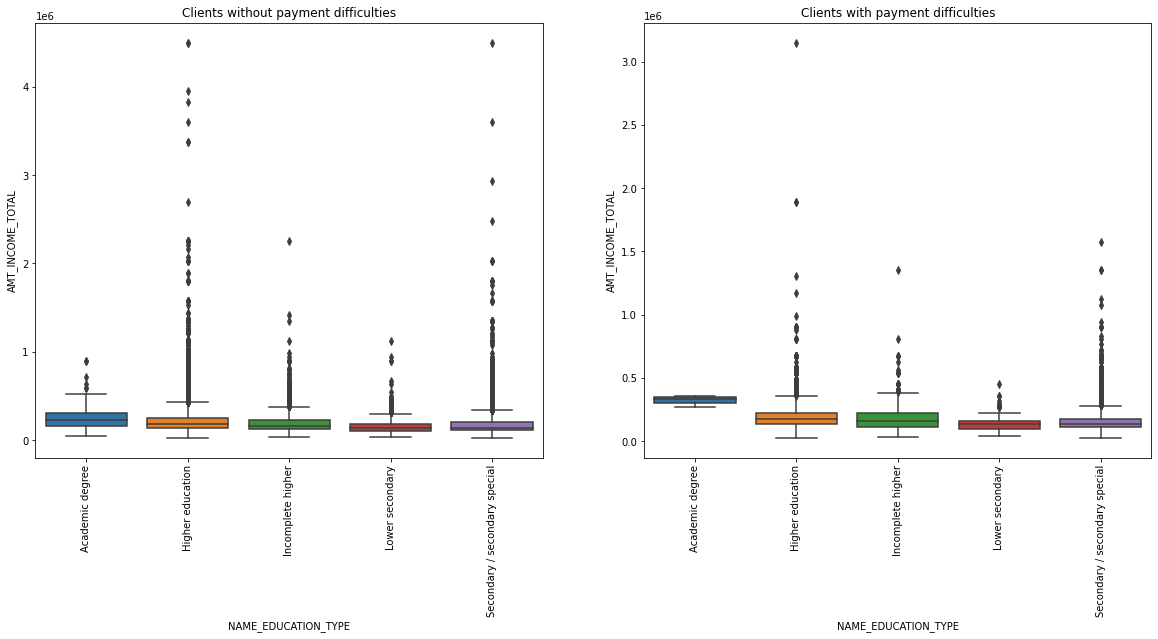

In [96]:
#### Distributions for 'AMT_INCOME_TOTAL' vs 'NAME_EDUCATION_TYPE'''
box_plot_numerical_categorical('AMT_INCOME_TOTAL','NAME_EDUCATION_TYPE')

#### Inferences from above Distributions for 'AMT_INCOME_TOTAL' vs 'NAME_EDUCATION_TYPE'
- Median of Income total is heighest for occupation type Academic degree
- More outliers present in the education type Higher education
- Median of income total is lowest for occupation type lower secondary
- Range of clients is more for Customer without payment difficulties as compared to Customer with payment difficulties

##### Distributions for 'YEARS_BIRTH' vs 'NAME_EDUCATION_TYPE'

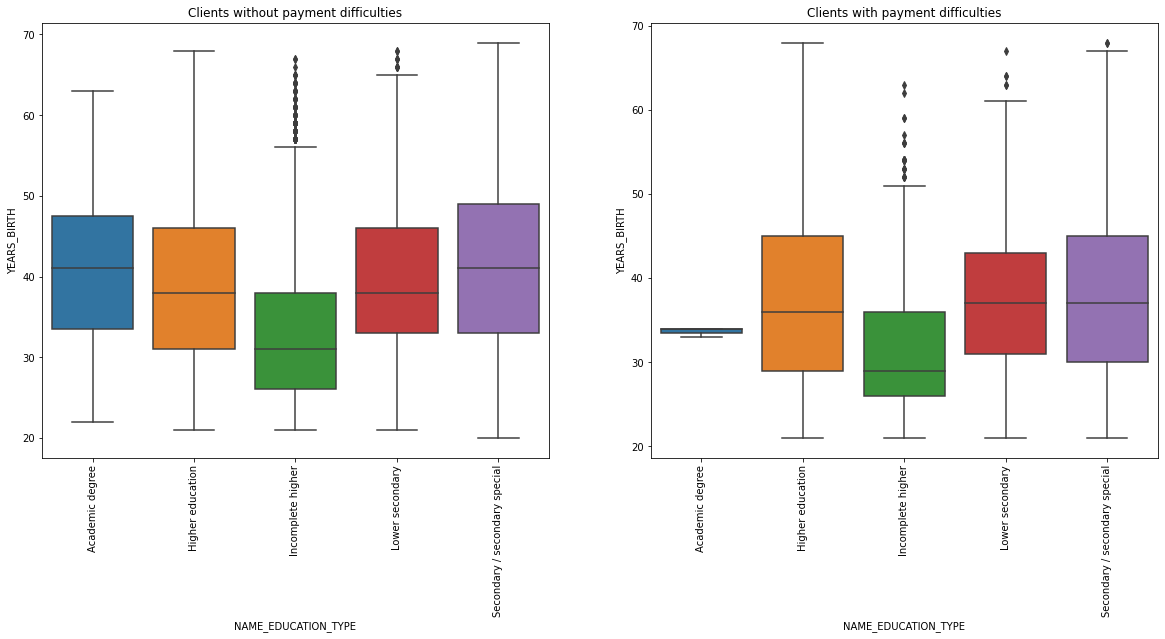

In [97]:
#### Distributions for 'YEARS_BIRTH' vs 'NAME_EDUCATION_TYPE'''
box_plot_numerical_categorical('YEARS_BIRTH','NAME_EDUCATION_TYPE')

#### Inferences from above Distributions for 'YEARS_BIRTH' vs 'NAME_EDUCATION_TYPE'
- Median of age is same for clients having education type Academic degree and Secondary / secondary special for Clients without Payment difficulities
- Median of age is lowest for education type Incomplete Higher 
- Outliers are not present for the category Academic degree, Higher education and Secondary / secondary special

##### Distributions for 'YEARS_BIRTH' vs 'NAME_INCOME_TYPE'

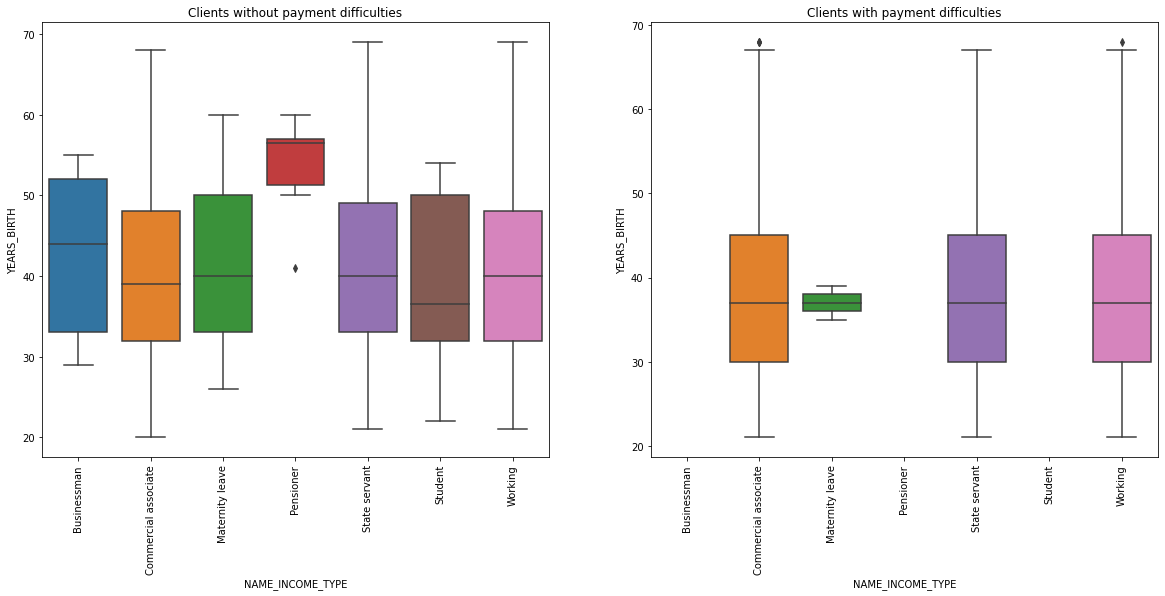

In [98]:
#### Distributions for 'YEARS_BIRTH' vs 'NAME_INCOME_TYPE'''
box_plot_numerical_categorical('YEARS_BIRTH','NAME_INCOME_TYPE')

#### Inferences from above Distributions for 'YEARS_BIRTH' vs 'NAME_INCOME_TYPE'
- Clients with Income type category Businessman, Pensioner and student are not present for 'Clients with payment difficulities'
- Median of all available category for 'Clients with payment difficulities' is same

#### Categorical- Categorical Variables

In [99]:
#### make function to plot categorical- categorical variable
def plot_categorical_categorical(cat1,cat2):
    plt.figure(figsize=(18,8)) 

    plt.subplot(1,2,1)
    ax = sns.countplot(data=df_appln_data_target_0,x=cat1,hue=cat2)
    plt.title('Client without payment difficulties')
    plt.xticks(rotation=90)
    plt.legend(loc='best')


    plt.subplot(1,2,2)
    ax = sns.countplot(data=df_appln_data_target_1,x=cat1,hue=cat2)
    plt.title('Client with payment difficulties')
    plt.legend(loc='best')
    plt.xticks(rotation=90)
    plt.show()

##### Distributions for 'FLAG_OWN_CAR' vs 'NAME_EDUCATION_TYPE'

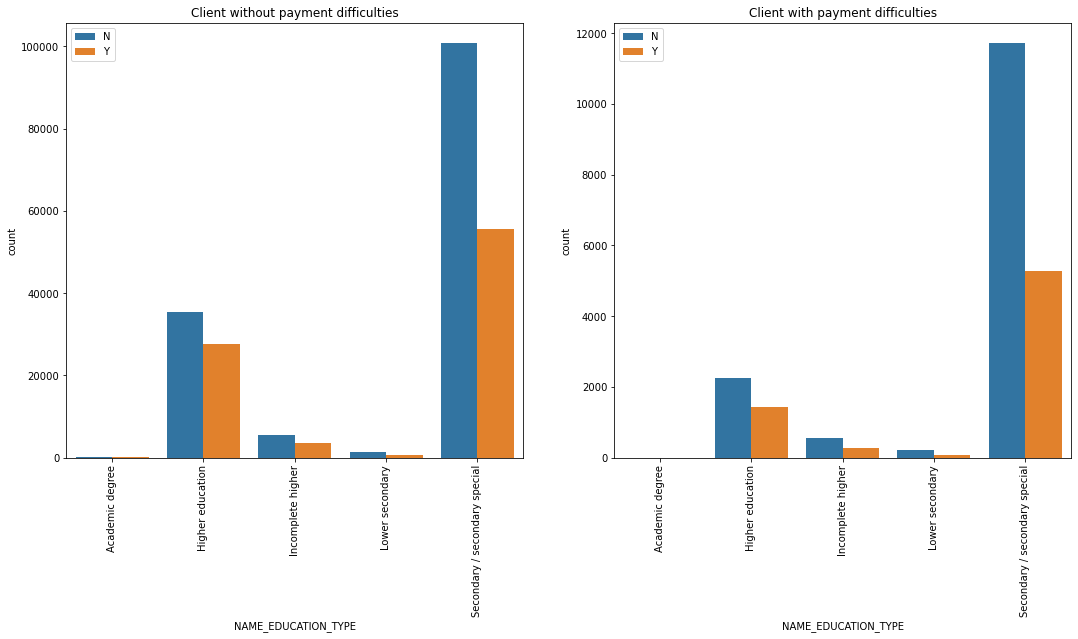

In [100]:
##plot distribution for 'FLAG_OWN_CAR' vs 'NAME_EDUCATION_TYPE'
plot_categorical_categorical('NAME_EDUCATION_TYPE','FLAG_OWN_CAR')

#### Inferences from above Distributions for 'FLAG_OWN_CAR' vs 'NAME_EDUCATION_TYPE'
- Clients with Education type academic are not available in data
- Clients having education type Secondary/secondary special have heighest number of cars
- Range of clients is more for Customer without payment difficulties as compared to Customer with payment difficulties

##### Distributions for 'OCCUPATION_TYPE' vs 'CODE_GENDER'

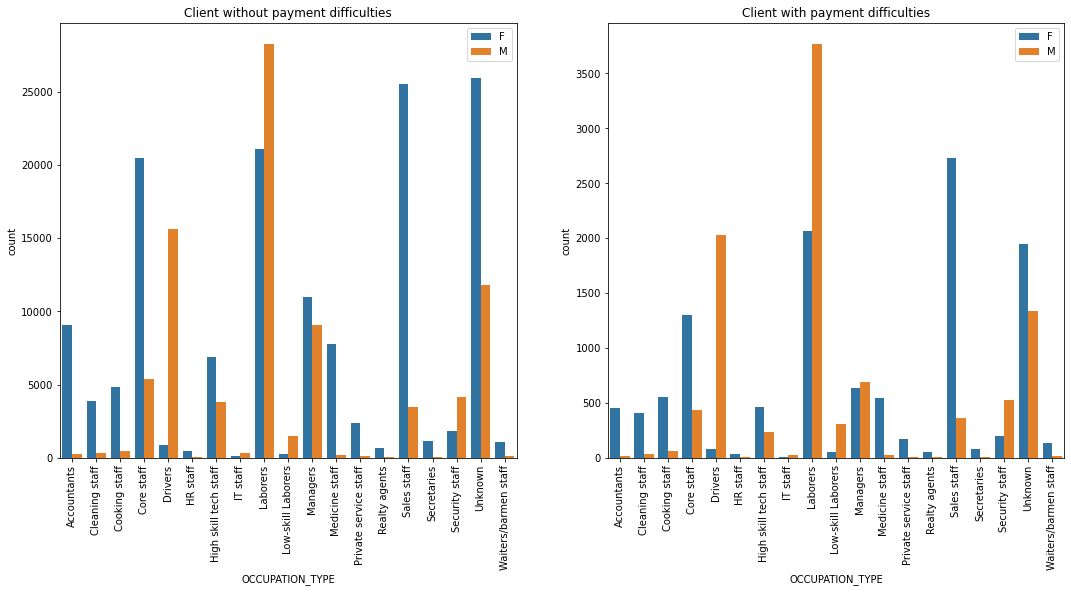

In [101]:
##plot distribution for 'OCCUPATION_TYPE' vs 'CODE_GENDER'
plot_categorical_categorical('OCCUPATION_TYPE','CODE_GENDER')

#### Inferences from above Distributions for 'OCCUPATION_TYPE' vs 'CODE_GENDER'
- Very few Female and male clints are present having occupation type HR staff and IT staff for both Customer without payment difficulties and Customer with payment difficulties
- Proportion of male and female clients with occupation type managers is some what same.
- Proportion of female clients is more having occupation type Core staff, Sales staff , Accountants , cleaning staff , cooking   staff and unknown
- Very less male clients present in Reality agents, Private service staff, Medicine staff, Waiters/barmen staff
- Number of male cilents is more in Drivers, Security staff and Laborers

##### Distributions for 'FLAG_OWN_REALTY' vs 'CODE_GENDER'

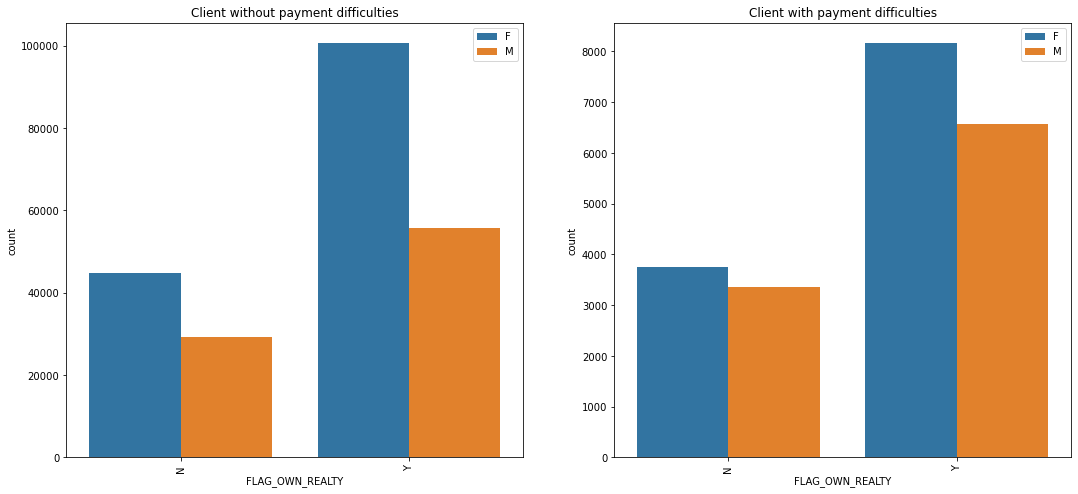

In [102]:
##plot distribution for 'FLAG_OWN_REALTY' vs 'CODE_GENDER'
plot_categorical_categorical('FLAG_OWN_REALTY','CODE_GENDER')

#### Inferences from above Distributions for 'FLAG_OWN_REALTY' vs 'CODE_GENDER'
- Number of female clients is more who owns reality in both Customer without payment difficulties and Customer with payment difficulties
- There is not huge difference between female and male clients having reality and not having reality in Customer with payment difficulties as compared to Customer without payment difficulties

##### Distributions for 'NAME_INCOME_TYPE' vs 'NAME_CONTRACT_TYPE'

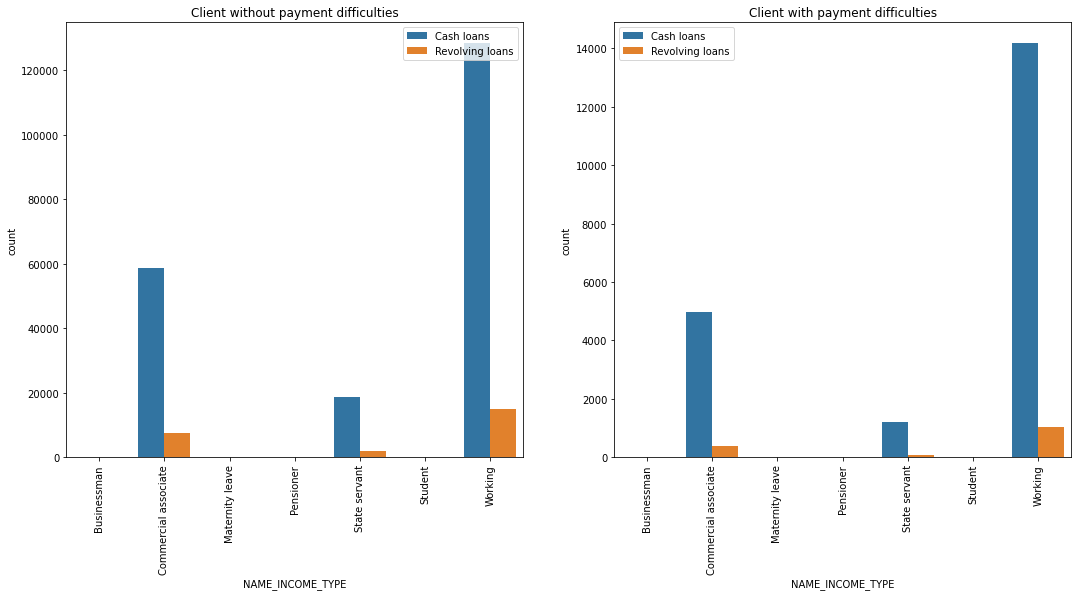

In [103]:
##plot distribution for 'NAME_INCOME_TYPE' vs 'NAME_CONTRACT_TYPE'
plot_categorical_categorical('NAME_INCOME_TYPE','NAME_CONTRACT_TYPE')

#### Inferences from above Distributions for 'NAME_INCOME_TYPE' vs 'NAME_CONTRACT_TYPE'
- There is not any correlation between income type Businessman , Maternity leave, Pensioner , Student and the contract type as no data available for these categories
- Number of cash loan client is very high having income type woking  

## 9. Analysis of Previous Application data('previous_application.csv')

### 9.1 Loading Previous Application data 

In [104]:
##load application data and analyze top 20 records
df_previous_appln_data=pd.read_csv('previous_application.csv')
df_previous_appln_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### 9.2 Invistigate input file (Check structure/metadata of data)

- Analyzing columns and their data types using info()
- Describing numerical attributes
- Analyzing shape, structure.
- Identify population health of the application data 

In [105]:
# check structure of all columns
df_previous_appln_data.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [106]:
##check shape of input data
df_previous_appln_data.shape

(1670214, 37)

In [107]:
## observe statistical information of the previous application data of numeric columns 
df_previous_appln_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### 9.3 Missing Value check

- As part of this section all the columns will be analyzed and useful columns will be filtered out that are required to meet objective
- Critical columns having missing/ NULL values will dropped/imputed according to the column population percentages
- We will be handling the missing values based on following stratagies:
    - MCAR (Missing completely at random)
    - MAR (Missing at random)
    - MNAR (Missing not at random)

In [108]:
###check for missing data of all columns
df_previous_appln_data.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [109]:
## check percentage of missing values in each column 
df_missing_value_percentage_pre_appln_data = 100*df_previous_appln_data.isnull().sum()/len(df_previous_appln_data)
df_missing_value_percentage_pre_appln_data

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [110]:
##get the columns having missing value percentage more then 22 to a list
df_missing_value_percentage_prv_appln_col=df_missing_value_percentage_pre_appln_data[df_missing_value_percentage_pre_appln_data>=22]
df_missing_value_percentage_prv_appln_col

AMT_ANNUITY                  22.286665
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [111]:
#drop columns with percentage of missing value >22
df_previous_appln_data=df_previous_appln_data.drop(columns=df_missing_value_percentage_prv_appln_col.index)
##validating the shape after dropping the columns
df_previous_appln_data.shape

(1670214, 23)

In [112]:
##validate missing value percentage
100*df_previous_appln_data.isnull().sum()/len(df_previous_appln_data)

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
NAME_YIELD_GROUP               0.000000
PRODUCT_COMBINATION            0.020716
dtype: float64

#### There are still many unwantd columnns which are present in the data that doesn't provide any valuable insights as such hence the best approach to tackle such cases is to drop these redundent columns

In [113]:
##check the structure of the column
df_previous_appln_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

In [114]:
##observe the values of 'NAME_CASH_LOAN_PURPOSE' column
df_previous_appln_data.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)    

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

In [115]:
##observe the values of 'CODE_REJECT_REASON' column
df_previous_appln_data.CODE_REJECT_REASON.value_counts(normalize=True)  

XAP       0.810132
HC        0.104915
LIMIT     0.033337
SCO       0.022432
CLIENT    0.015828
SCOFR     0.007670
XNA       0.003140
VERIF     0.002116
SYSTEM    0.000429
Name: CODE_REJECT_REASON, dtype: float64

In [116]:
##observe the values of 'NAME_GOODS_CATEGORY' column
df_previous_appln_data.NAME_GOODS_CATEGORY.value_counts()  

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In above three columns percentage of XNA / XPA values is more than 50% so drop following columns
- NAME_CASH_LOAN_PURPOSE
- CODE_REJECT_REASON
- NAME_GOODS_CATEGORY

In [117]:
##drop the above columns
drop_columns_1 =['NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON','NAME_GOODS_CATEGORY']
df_previous_appln_data=df_previous_appln_data.drop(columns=drop_columns_1)
df_previous_appln_data.shape

(1670214, 20)

Also according to observation we can drop following columns :
- WEEKDAY_APPR_PROCESS_START- On which day of the week did the client apply for the loan
- HOUR_APPR_PROCESS_START - Approximately at what hour did the client apply for the loan
- NAME_PORTFOLIO - Was the previous application for CASH, POS, CAR, …
- NAME_PRODUCT_TYPE - Was the previous application x-sell o walk-in
- CHANNEL_TYPE - Through which channel we acquired the client on the previous application
- SELLERPLACE_AREA - Selling area of seller place of the previous application
- NAME_SELLER_INDUSTRY - The industry of the seller
- PRODUCT_COMBINATION - Detailed product combination of the previous application

In [118]:
## drop these columns
drop_columns_2 = [
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE',
    'CHANNEL_TYPE',
    'SELLERPLACE_AREA',
    'NAME_SELLER_INDUSTRY',
    'PRODUCT_COMBINATION']
df_previous_appln_data=df_previous_appln_data.drop(columns=drop_columns_2)
df_previous_appln_data.shape

(1670214, 12)

In [119]:
df_previous_appln_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,17145.0,17145.0,Y,1,Approved,-73,Cash through the bank,Repeater,middle
1,2802425,108129,Cash loans,607500.0,679671.0,Y,1,Approved,-164,XNA,Repeater,low_action
2,2523466,122040,Cash loans,112500.0,136444.5,Y,1,Approved,-301,Cash through the bank,Repeater,high
3,2819243,176158,Cash loans,450000.0,470790.0,Y,1,Approved,-512,Cash through the bank,Repeater,middle
4,1784265,202054,Cash loans,337500.0,404055.0,Y,1,Refused,-781,Cash through the bank,Repeater,high


In [120]:
## observe the structure of data
df_previous_appln_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 12 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 6   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 7   NAME_CONTRACT_STATUS         1670214 non-null  object 
 8   DAYS_DECISION                1670214 non-null  int64  
 9   NAME_PAYMENT_TYPE            1670214 non-null  object 
 10  NAME_CLIENT_TYPE             1670214 non-null  object 
 11  NAME_YIELD_GROUP             1670214 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory 

In [121]:
## check the value counts of each category / object column 
##validate the value counts of FLAG_LAST_APPL_PER_CONTRACT
df_previous_appln_data.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [122]:
##validate the value counts of NAME_CONTRACT_TYPE
df_previous_appln_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [123]:
###XNA values are present in this column 
### remove the rows where category = XNA
df_previous_appln_data = df_previous_appln_data[(df_previous_appln_data.NAME_CONTRACT_TYPE != 'XNA')]
##check the value counts of NAME_CONTRACT_TYPE again
df_previous_appln_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [124]:
##observe the value counts of NAME_CLIENT_TYPE   
df_previous_appln_data.NAME_CLIENT_TYPE.value_counts()

Repeater     1230960
New           301342
Refreshed     135625
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [125]:
###XNA values are present in this column 
### remove the rows where category = XNA

df_previous_appln_data = df_previous_appln_data[(df_previous_appln_data.NAME_CLIENT_TYPE != 'XNA')]

##check the value counts of NAME_CLIENT_TYPE again

df_previous_appln_data.NAME_CLIENT_TYPE.value_counts()

Repeater     1230960
New           301342
Refreshed     135625
Name: NAME_CLIENT_TYPE, dtype: int64

In [126]:
##observe the value counts of NAME_PAYMENT_TYPE  
df_previous_appln_data["NAME_PAYMENT_TYPE"].value_counts(normalize=True)

Cash through the bank                        0.619248
XNA                                          0.375192
Non-cash from your account                   0.004909
Cashless from the account of the employer    0.000651
Name: NAME_PAYMENT_TYPE, dtype: float64

In [127]:
##NAME_PAYMENT_TYPE column has around 18% XNA values 
## drop this column for the further analysis
df_previous_appln_data=df_previous_appln_data.drop(columns=['NAME_PAYMENT_TYPE'])
df_previous_appln_data.shape

(1667927, 11)

In [128]:
##observe the value counts of NAME_YIELD_GROUP   
df_previous_appln_data.NAME_YIELD_GROUP.value_counts(normalize=True)

XNA           0.309201
middle        0.230957
high          0.211796
low_normal    0.192918
low_action    0.055127
Name: NAME_YIELD_GROUP, dtype: float64

In [129]:
##NAME_YIELD_GROUP column has around 30% XNA values 
## drop this column for the further analysis
df_previous_appln_data=df_previous_appln_data.drop(columns=['NAME_YIELD_GROUP'])
df_previous_appln_data.shape

(1667927, 10)

In [130]:
df_previous_appln_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE
0,2030495,271877,Consumer loans,17145.0,17145.0,Y,1,Approved,-73,Repeater
1,2802425,108129,Cash loans,607500.0,679671.0,Y,1,Approved,-164,Repeater
2,2523466,122040,Cash loans,112500.0,136444.5,Y,1,Approved,-301,Repeater
3,2819243,176158,Cash loans,450000.0,470790.0,Y,1,Approved,-512,Repeater
4,1784265,202054,Cash loans,337500.0,404055.0,Y,1,Refused,-781,Repeater


In [131]:
###now we will analyse numerical columns 
df_previous_appln_data.DAYS_DECISION

0           -73
1          -164
2          -301
3          -512
4          -781
           ... 
1670209    -544
1670210   -1694
1670211   -1488
1670212   -1185
1670213   -1193
Name: DAYS_DECISION, Length: 1667927, dtype: int64

In [132]:
##Days can not be negative so we will convert it to positive integer
##Also we will convert days to years for better understsnding
df_previous_appln_data['DAYS_DECISION'] = df_previous_appln_data['DAYS_DECISION'].abs()
df_previous_appln_data['YEARS_DECISION']=df_previous_appln_data.DAYS_DECISION/ 365
#df_previous_appln_data['DAYS_DECISION'] =df_previous_appln_data.DAYS_DECISION/ 365
#df_previous_appln_data['DAYS_DECISION']

In [133]:
##According to the above observation we can ignore days decision columns 
df_previous_appln_data=df_previous_appln_data.drop(columns=['DAYS_DECISION'])
df_previous_appln_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667927 entries, 0 to 1670213
Data columns (total 10 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1667927 non-null  int64  
 1   SK_ID_CURR                   1667927 non-null  int64  
 2   NAME_CONTRACT_TYPE           1667927 non-null  object 
 3   AMT_APPLICATION              1667927 non-null  float64
 4   AMT_CREDIT                   1667926 non-null  float64
 5   FLAG_LAST_APPL_PER_CONTRACT  1667927 non-null  object 
 6   NFLAG_LAST_APPL_IN_DAY       1667927 non-null  int64  
 7   NAME_CONTRACT_STATUS         1667927 non-null  object 
 8   NAME_CLIENT_TYPE             1667927 non-null  object 
 9   YEARS_DECISION               1667927 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 140.0+ MB


In [134]:
##NFLAG_LAST_APPL_IN_DAY column can be ignored 
df_previous_appln_data=df_previous_appln_data.drop(columns=['NFLAG_LAST_APPL_IN_DAY'])
df_previous_appln_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667927 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1667927 non-null  int64  
 1   SK_ID_CURR                   1667927 non-null  int64  
 2   NAME_CONTRACT_TYPE           1667927 non-null  object 
 3   AMT_APPLICATION              1667927 non-null  float64
 4   AMT_CREDIT                   1667926 non-null  float64
 5   FLAG_LAST_APPL_PER_CONTRACT  1667927 non-null  object 
 6   NAME_CONTRACT_STATUS         1667927 non-null  object 
 7   NAME_CLIENT_TYPE             1667927 non-null  object 
 8   YEARS_DECISION               1667927 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 127.3+ MB


### 9.4 Check Outliers

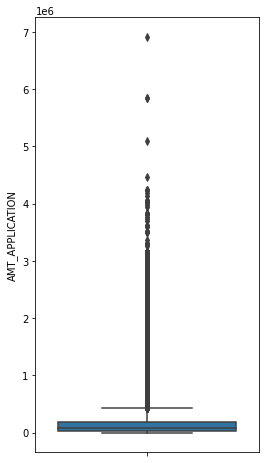

In [135]:
## plot box plot of AMT_APPLICATION to check outliers
plt.figure(figsize = (4,8))
sns.boxplot( y=df_previous_appln_data['AMT_APPLICATION'])
plt.show()

According to the above grapg there are many customers having AMT_APPLICATION <0 , so we can drop rows where AMT_APPLICATION value is less than zero

In [136]:
df_previous_appln_data.shape

(1667927, 9)

In [137]:
###consider the values which are having AMT_APPLICATION>0
df_previous_appln_data = df_previous_appln_data[(df_previous_appln_data.AMT_APPLICATION > 0)]
df_previous_appln_data.shape

(1276876, 9)

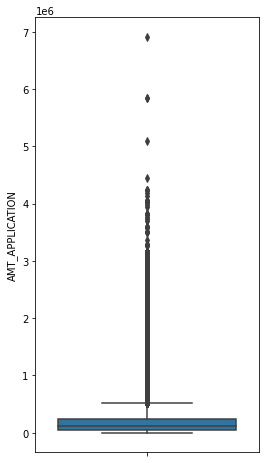

In [138]:
## plot box plot of AMT_APPLICATION to check outliers
plt.figure(figsize = (4,8))
sns.boxplot( y=df_previous_appln_data['AMT_APPLICATION'])
plt.show()

In [139]:
## There are outliers present in the above box plot 
## we will remove these outliers and consider the values AMT_APPLICATION<=2.5M (million)
df_previous_appln_data = df_previous_appln_data[(df_previous_appln_data.AMT_APPLICATION < 2.5*pow(10,6))]
df_previous_appln_data.shape

(1276039, 9)

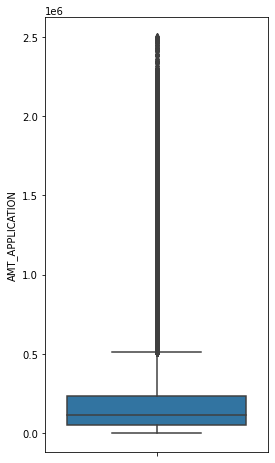

In [140]:
## Again boxplot to validate outliers
plt.figure(figsize = (4,8))
sns.boxplot( y=df_previous_appln_data['AMT_APPLICATION'])
plt.show()

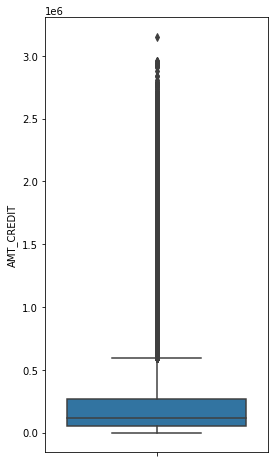

In [141]:
## plot box plot of AMT_CREDIT to check outliers
plt.figure(figsize = (4,8))
sns.boxplot( y=df_previous_appln_data['AMT_CREDIT'])
plt.show()

In [142]:
## There are outliers present in the above box plot 
## we will remove these outliers and consider the values AMT_CREDIT<=3M (million)
df_previous_appln_data = df_previous_appln_data[(df_previous_appln_data.AMT_CREDIT < 3*pow(10,6))]
df_previous_appln_data.shape

(1276038, 9)

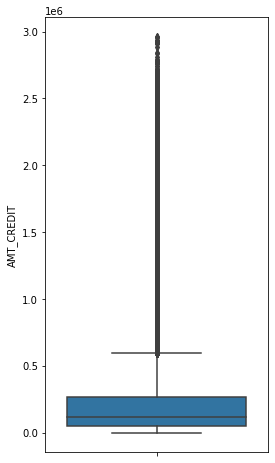

In [143]:
## plot box plot of AMT_CREDIT to check outliers
plt.figure(figsize = (4,8))
sns.boxplot( y=df_previous_appln_data['AMT_CREDIT'])
plt.show()

### 9.5 Univariate Analysis

#### Analysis of Categorical Variables 

In [144]:
df_previous_appln_data["NAME_CLIENT_TYPE"].value_counts()

Repeater     867603
New          297048
Refreshed    111387
Name: NAME_CLIENT_TYPE, dtype: int64

In [145]:
df_previous_appln_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276038 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1276038 non-null  int64  
 1   SK_ID_CURR                   1276038 non-null  int64  
 2   NAME_CONTRACT_TYPE           1276038 non-null  object 
 3   AMT_APPLICATION              1276038 non-null  float64
 4   AMT_CREDIT                   1276038 non-null  float64
 5   FLAG_LAST_APPL_PER_CONTRACT  1276038 non-null  object 
 6   NAME_CONTRACT_STATUS         1276038 non-null  object 
 7   NAME_CLIENT_TYPE             1276038 non-null  object 
 8   YEARS_DECISION               1276038 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 97.4+ MB


##### Analysis of NAME_CONTRACT_TYPE column

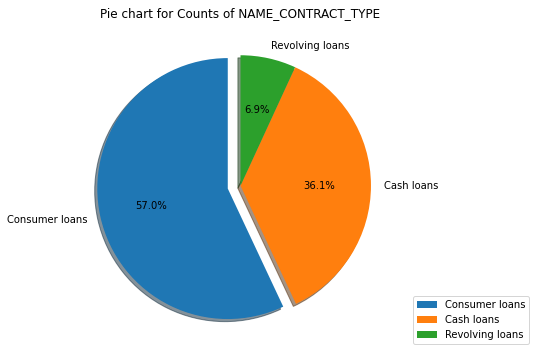

In [146]:
##plot the pie chart of NAME_CONTRACT_TYPE
contract_type = df_previous_appln_data["NAME_CONTRACT_TYPE"].value_counts()
plt.figure(figsize=[8,6])

explode = (0.1, 0, 0)
contract_type.plot.pie( explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90 ,title='Pie chart for Counts of NAME_CONTRACT_TYPE')
#plt.set_title('Pie chart for Counts of NAME_CONTRACT_TYPE')
plt.ylabel('')
plt.legend(loc='lower right',bbox_to_anchor=(1.4,0))
plt.show()

#### Inferences of NAME_CONTRACT_TYPE column from above distribution
- 44.7 % of clients demanding for cash loans heighest percentage of contract type
- Only 11.6 % clients having Revolving loans lowest percentage of contract type
- 1% of difference is there between Cash loans and Consumer loans

##### Analysis of NAME_CONTRACT_STATUS column

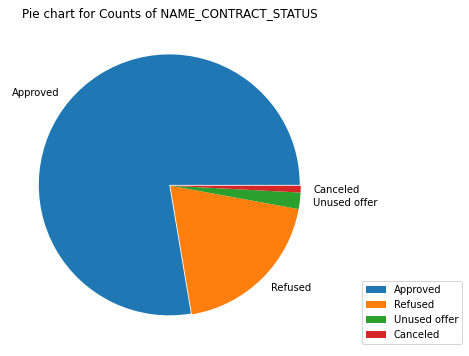

In [147]:
##plot the pie chart of NAME_CONTRACT_STATUS
contract_status = df_previous_appln_data["NAME_CONTRACT_STATUS"].value_counts()
plt.figure(figsize=[9,6])

explode = (0.01, 0, 0,0)
contract_status.plot.pie( explode=explode,
        shadow=False ,title='Pie chart for Counts of NAME_CONTRACT_STATUS')
#plt.set_title('Pie chart for Counts of NAME_CONTRACT_TYPE')
plt.ylabel('')
plt.legend(loc='lower right',bbox_to_anchor=(1.41,0))
plt.show()


#### Inferences of NAME_CONTRACT_STATUS column from above distribution
- From the available data 62.1 % loans has been approved 
- 1.6 % of clients consists of unused offer 
- There is very less difference between the clients who canceled and refused loans

##### Analysis of NAME_CLIENT_TYPE column

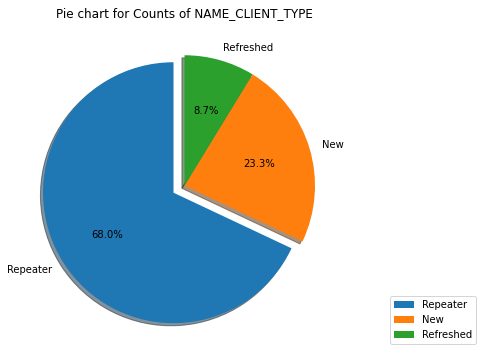

In [148]:
##plot the pie chart of NAME_CLIENT_TYPE
client_type = df_previous_appln_data["NAME_CLIENT_TYPE"].value_counts()
plt.figure(figsize=[8,6])

explode = (0.1, 0, 0)
client_type.plot.pie( explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90 ,title='Pie chart for Counts of NAME_CLIENT_TYPE')
#plt.set_title('Pie chart for Counts of NAME_CONTRACT_TYPE')
plt.ylabel('')
plt.legend(loc='lower right',bbox_to_anchor=(1.41,0))
plt.show()

#### Inferences of NAME_CLIENT_TYPE column from above distribution
- Heighest percentage of clients are repeater clients which is 73.8%
- 8.1% of clients are refresher, lowest percentage of the data
- 18.1% of new clients are available according to data

#### Analysis of Numerical Variables 

##### Analysis of AMT_APPLICATION column

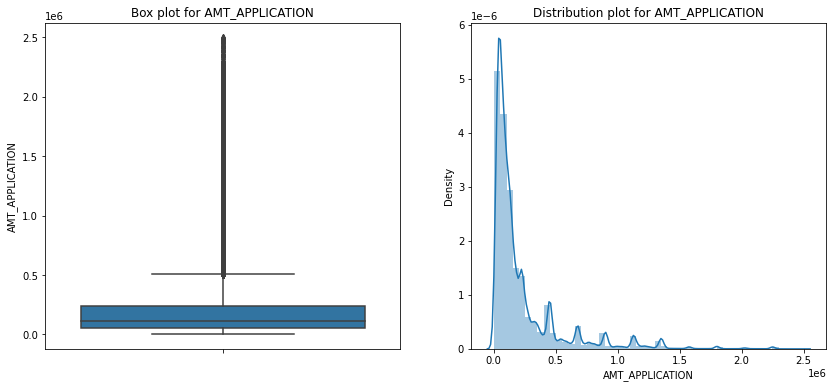

In [149]:
##plot box plot of AMT_ANNUITY column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot( y=df_previous_appln_data['AMT_APPLICATION'],ax=ax[0])
ax[0].set_title('Box plot for AMT_APPLICATION')

sns.distplot(df_previous_appln_data.AMT_APPLICATION,ax=ax[1])
ax[1].set_title('Distribution plot for AMT_APPLICATION')
plt.show()

#### Inferences of AMT_APPLICATION column from above distribution
- In the box plot quartile is present at 0.1M 
- Majority value lies between 0.1 to 0.3 M

##### Analysis of AMT_CREDIT column

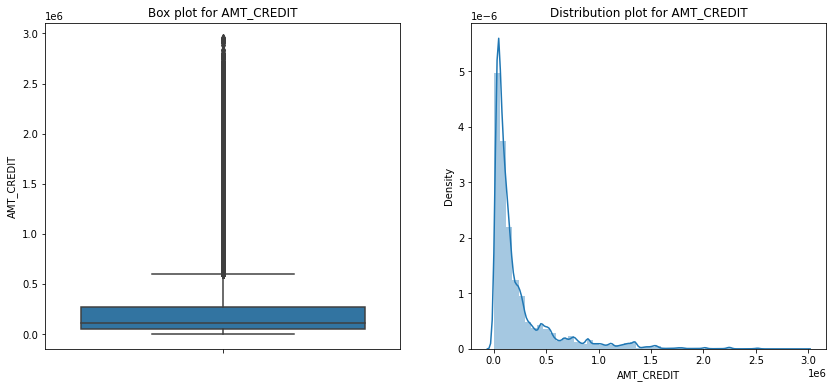

In [150]:
##plot box plot of AMT_CREDIT column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot( y=df_previous_appln_data['AMT_CREDIT'],ax=ax[0])
ax[0].set_title('Box plot for AMT_CREDIT')

sns.distplot(df_previous_appln_data.AMT_CREDIT,ax=ax[1])
ax[1].set_title('Distribution plot for AMT_CREDIT')
plt.show()

#### Inferences of AMT_CREDIT column from above distribution
- In the box plot quartile is present at 0.1 million 
- Majority value lies between 0.1 to 0.3 million

##### Analysis of YEARS_DECISION column

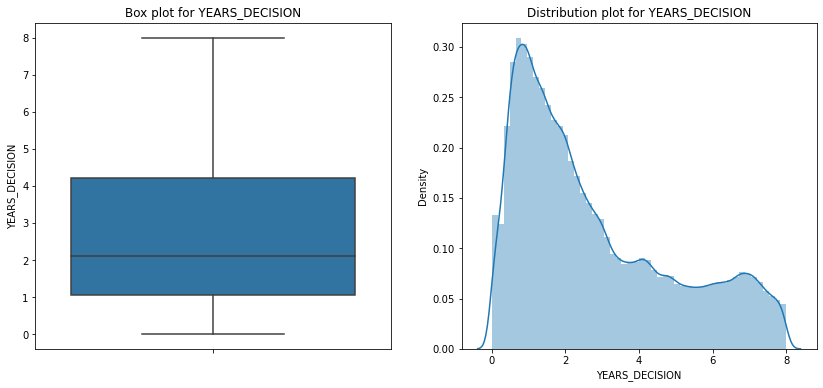

In [151]:
##plot box plot of YEARS_DECISION column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot( y=df_previous_appln_data['YEARS_DECISION'],ax=ax[0])
ax[0].set_title('Box plot for YEARS_DECISION')

sns.distplot(df_previous_appln_data.YEARS_DECISION,ax=ax[1])
ax[1].set_title('Distribution plot for YEARS_DECISION')
plt.show()

#### Inferences of YEARS_DECISION column from above distribution
- Maximun clients take 1 to 4 years to take decision 
- In box plot quartile is present at 2 years
- 75% of data is covered between 0 to 4 years

### 9.6 Bivariate Analysis

#### Numerical Vs Numerical Variables

In [152]:
###get all numerical columns in a list
numerical_columns1= ['AMT_APPLICATION','AMT_CREDIT', 'YEARS_DECISION']
numerical_columns1

['AMT_APPLICATION', 'AMT_CREDIT', 'YEARS_DECISION']

##### Distribution of 'AMT_APPLICATION', 'AMT_CREDIT', 'YEARS_DECISION'

<Figure size 432x432 with 0 Axes>

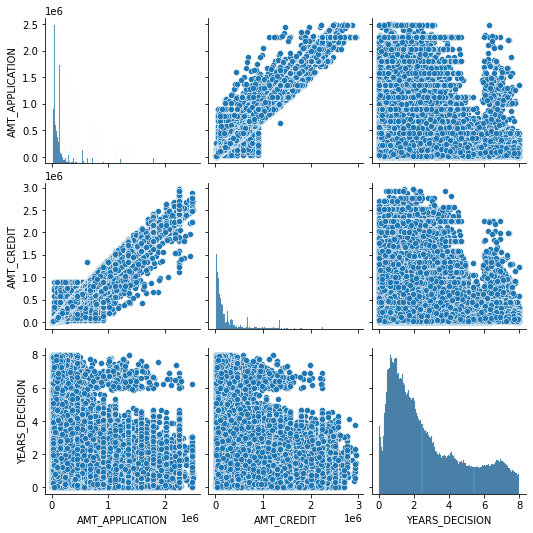

In [153]:
### pair plot of all numerical columns that mentioned above
plt.figure(figsize=[6,6])
plot_pair=df_previous_appln_data[numerical_columns1]
sns.pairplot(plot_pair)
plt.show()

#### Inferences of YEARS_DECISION column from above distribution
- application amount and credit amount is showing linear relationship at high range 
- There is not ant correlation is observed from above distribution

#### Numerical- Categorical Variables

##### Distribution of 'AMT_CREDIT' vs 'NAME_CONTRACT_STATUS'

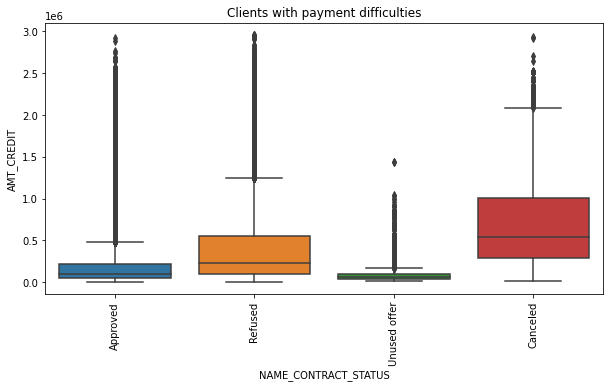

In [154]:
###plot the Distributions for 'AMT_CREDIT' vs 'NAME_CONTRACT_STATUS'
plt.figure(figsize=(10,5)) 

ax = sns.boxplot(data=df_previous_appln_data,y='AMT_CREDIT',x='NAME_CONTRACT_STATUS')
plt.title('Clients with payment difficulties')
plt.xticks(rotation=90)
plt.show()

#### Inferences of above Distribution
- Cancelled category have heighest quartile
- Outliers are present in each category
- Quartile of category Unused offer is lowest 

##### Distribution of 'YEARS_DECISION' vs 'NAME_CONTRACT_STATUS'

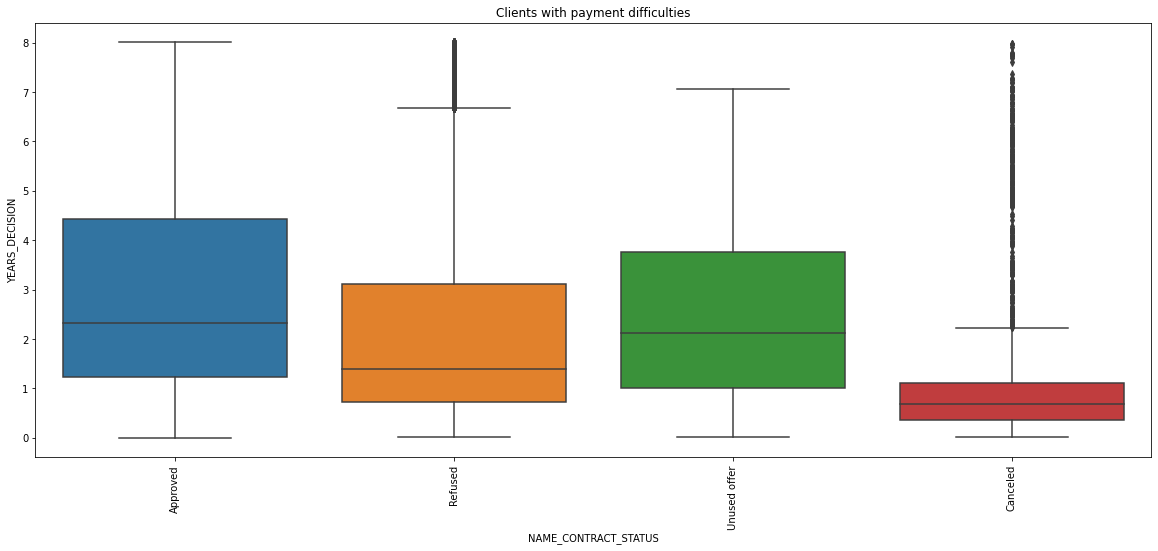

In [155]:
###plot the Distributions for ''YEARS_DECISION' vs 'NAME_CONTRACT_STATUS'
plt.figure(figsize=(20,8)) 

ax = sns.boxplot(data=df_previous_appln_data,y='YEARS_DECISION',x='NAME_CONTRACT_STATUS')
plt.title('Clients with payment difficulties')
plt.xticks(rotation=90)
plt.show()

#### Inferences of above Distribution
- Median of Cancelled category to take decision is lowest
- Outliers are not present for Approved and Unused offer category

##### Distribution of 'YEARS_DECISION' vs 'NAME_CLIENT_TYPE'

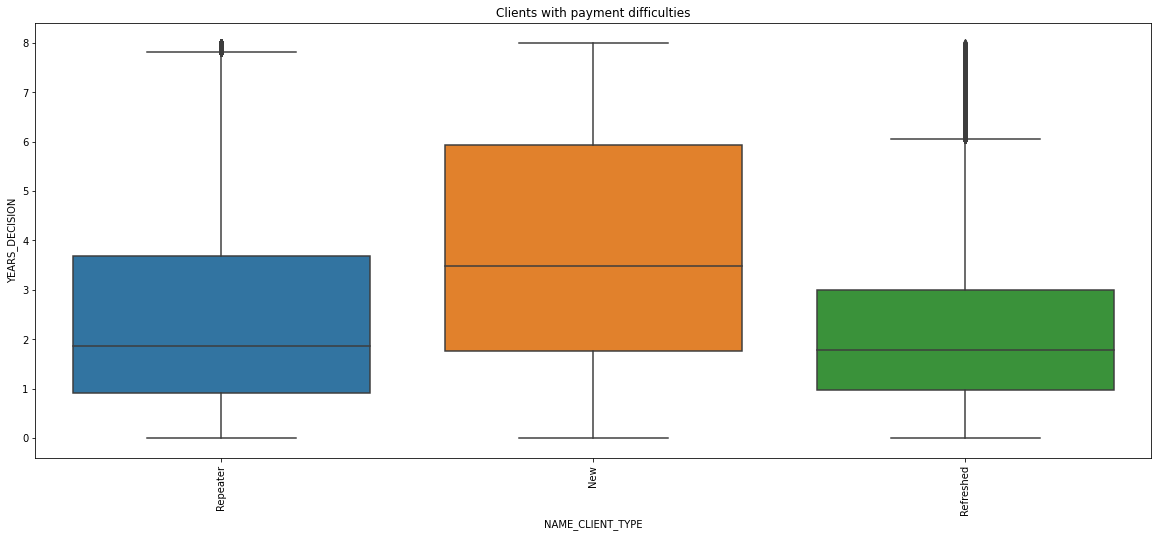

In [156]:
###plot the Distributions for ''YEARS_DECISION' vs 'NAME_CLIENT_TYPE'
plt.figure(figsize=(20,8)) 

ax = sns.boxplot(data=df_previous_appln_data,y='YEARS_DECISION',x='NAME_CLIENT_TYPE')
plt.title('Clients with payment difficulties')
plt.xticks(rotation=90)
plt.show()

#### Inferences of above Distribution
- Outliers are not present for new clients
- median for Repeater and Refreshed clients is approximately same
- Average years to take decision is more for new clients as compared with refreshed and repeater clients

#### Categorical- Categorical Variables

##### Distributions for 'NAME_CLIENT_TYPE' vs 'NAME_CONTRACT_STATUS'

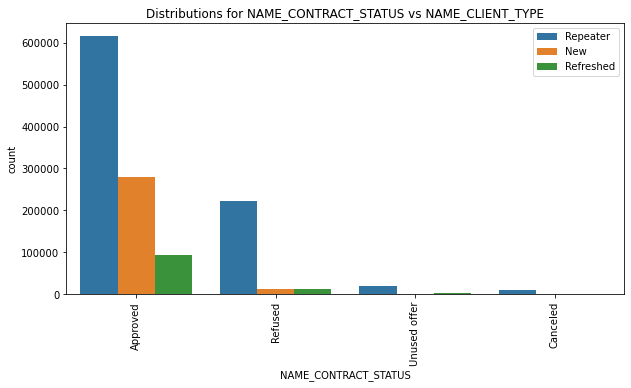

In [157]:
##plot the distribution for 'NAME_CLIENT_TYPE' vs 'NAME_CONTRACT_STATUS'
plt.figure(figsize=(10,5)) 
ax = sns.countplot(data=df_previous_appln_data,x='NAME_CONTRACT_STATUS',hue='NAME_CLIENT_TYPE')
plt.title('Distributions for NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE')
plt.xticks(rotation=90)
plt.legend(loc='best')

#### Inferences of above Distribution
- Value counts of New and Refreshed clients is same for Refused category
- We can say that for New and Refreshed clients has not cancelled loan as value cont is not present for unused and cancelled category
- Approved value count is much higher Repeater clients as compared to New and Refreshed clients

##### Distributions for 'NAME_CONTRACT_TYPE' vs 'NAME_CONTRACT_STATUS'

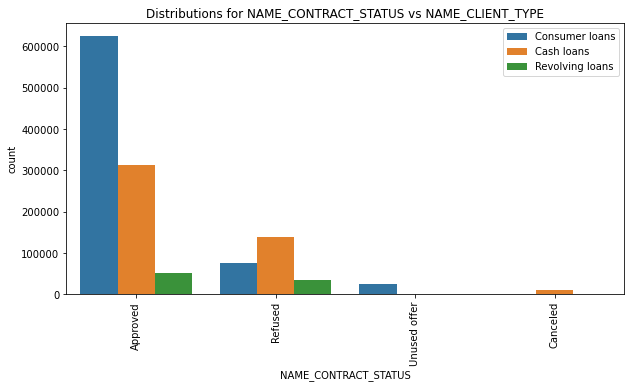

In [158]:
##plot the distribution for 'NAME_CONTRACT_TYPE' vs 'NAME_CONTRACT_STATUS'
plt.figure(figsize=(10,5)) 
ax = sns.countplot(data=df_previous_appln_data,x='NAME_CONTRACT_STATUS',hue='NAME_CONTRACT_TYPE')
plt.title('Distributions for NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE')
plt.xticks(rotation=90)
plt.legend(loc='best')

#### Inferences of above Distribution
- There is no correlation between Unused offer vs Cash loan and Unused offer vs Revolving loans
- There is no correlation between Cancelled category vs Consumer loan and Cancelled category vs Revolving loans
- More number of clients Refused cash loans as compared with Revolving and Consumer loans
- Highest number of consumer loans has been apporved

## 10. Merge Application data and Previous Application data

In [159]:
##observe Application data
df_appln_data_4.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,3648,2120,1,Laborers,1.0,Business Entity,0.262949,0.139376,25,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,1186,291,1,Core staff,2.0,School,0.622246,NaN,45,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,4260,2531,1,Laborers,1.0,Government,0.555912,0.729567,52,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,9833,2437,1,Laborers,2.0,Business Entity,0.650442,NaN,52,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,4311,3458,1,Core staff,1.0,Religion,0.322738,NaN,54,8


In [160]:
##observe Application data
df_previous_appln_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,YEARS_DECISION
0,2030495,271877,Consumer loans,17145.0,17145.0,Y,Approved,Repeater,0.200000
1,2802425,108129,Cash loans,607500.0,679671.0,Y,Approved,Repeater,0.449315
2,2523466,122040,Cash loans,112500.0,136444.5,Y,Approved,Repeater,0.824658
3,2819243,176158,Cash loans,450000.0,470790.0,Y,Approved,Repeater,1.402740
4,1784265,202054,Cash loans,337500.0,404055.0,Y,Refused,Repeater,2.139726


#### 'SK_ID_CURR' is common column between Application data and Previous Application data , so we will merge these two dataframes and perform further analysis on the combined Dataframe

In [161]:
#merging the application_data with previous application data
df_merge = pd.merge(left=df_appln_data_4, right=df_previous_appln_data,how='inner', on='SK_ID_CURR',suffixes=['_PREV','_CURR'])

In [162]:
##Obsereve merged dataframe
df_merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_PREV,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_PREV,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_TYPE_CURR,AMT_APPLICATION,AMT_CREDIT_CURR,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,YEARS_DECISION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,3648,2120,1,Laborers,1.0,Business Entity,0.262949,0.139376,25,1,1038818,Consumer loans,179055.0,179055.0,Y,Approved,New,1.660274
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,1186,291,1,Core staff,2.0,School,0.622246,NaN,45,3,1810518,Cash loans,900000.0,1035882.0,Y,Approved,Repeater,2.043836
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,1186,291,1,Core staff,2.0,School,0.622246,NaN,45,3,2636178,Consumer loans,337500.0,348637.5,Y,Approved,Refreshed,2.268493
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,1186,291,1,Core staff,2.0,School,0.622246,NaN,45,3,2396755,Consumer loans,68809.5,68053.5,Y,Approved,Refreshed,6.413699
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,4260,2531,1,Laborers,1.0,Government,0.555912,0.729567,52,0,1564014,Consumer loans,24282.0,20106.0,Y,Approved,New,2.232877


In [163]:
## validate the shape of merged df
df_merge.shape

(881260, 33)

In [164]:
## validate the structure of merged df
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881260 entries, 0 to 881259
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   881260 non-null  int64   
 1   TARGET                       881260 non-null  category
 2   NAME_CONTRACT_TYPE_PREV      881260 non-null  category
 3   CODE_GENDER                  881260 non-null  category
 4   FLAG_OWN_CAR                 881260 non-null  category
 5   FLAG_OWN_REALTY              881260 non-null  category
 6   CNT_CHILDREN                 881260 non-null  category
 7   AMT_INCOME_TOTAL             881260 non-null  float64 
 8   AMT_CREDIT_PREV              881260 non-null  float64 
 9   AMT_ANNUITY                  881260 non-null  float64 
 10  AMT_GOODS_PRICE              880411 non-null  float64 
 11  NAME_INCOME_TYPE             881260 non-null  category
 12  NAME_EDUCATION_TYPE          881260 non-null

##### now devide the merge dateframe into two dataframes 
- 1) df_merge_target_1: Target variable=1
- 2) df_merge_target_0: Target variable=0

In [165]:
##create two dataframes for further analysis
df_merge_target_0=df_merge[df_merge['TARGET']==0]
df_merge_target_1=df_merge[df_merge['TARGET']==1]

In [166]:
##check shape of dataframe
df_merge_target_0.shape

(801937, 33)

In [167]:
##check shape of dataframe
df_merge_target_1.shape

(79323, 33)

#### Distribution of 'NAME_CONTRACT_STATUS' with different Variables

###### Distributions for 'NAME_CONTRACT_STATUS' and 'NAME_CONTRACT_TYPE_PREV'

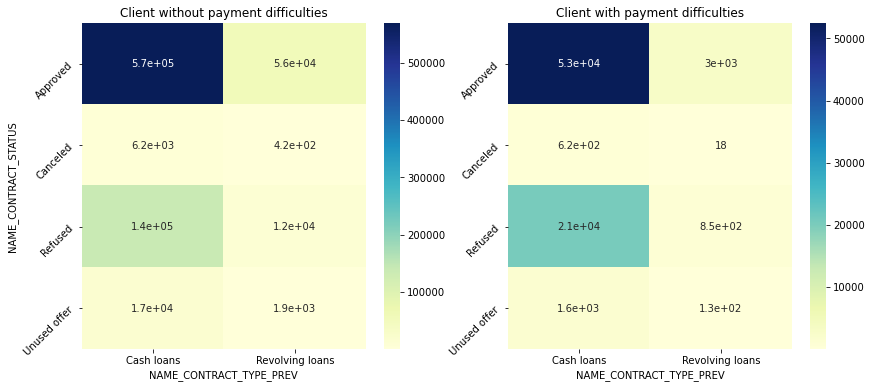

In [168]:
###Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'NAME_CONTRACT_TYPE_PREV'      
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
contract_type_wise_contarct_type = df_merge_target_0.groupby(['NAME_CONTRACT_STATUS'])['NAME_CONTRACT_TYPE_PREV'].value_counts().unstack()
sns.heatmap(data=contract_type_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client without payment difficulties')
plt.yticks(rotation=45)


plt.subplot(1,2,2)
contract_type_wise_contarct_type = df_merge_target_1.groupby(['NAME_CONTRACT_STATUS'])['NAME_CONTRACT_TYPE_PREV'].value_counts().unstack()
sns.heatmap(data=contract_type_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client with payment difficulties')
plt.yticks(rotation=45)
plt.ylabel('')
plt.show()

#### Inferences of above Distribution
- Very less number of Revolving loans has been cancelled for the Clients with payment difficulities
- Clients with payment difficulities has been refused to take Cash loans
- We can say that many clients applied for cash loans as number of Apporved cash loans is very large as compared to revoloving loans for both Clients with payment difficulities and Clients without payment difficulities

##### Distributions for 'NAME_CONTRACT_STATUS' and 'CODE_GENDER'

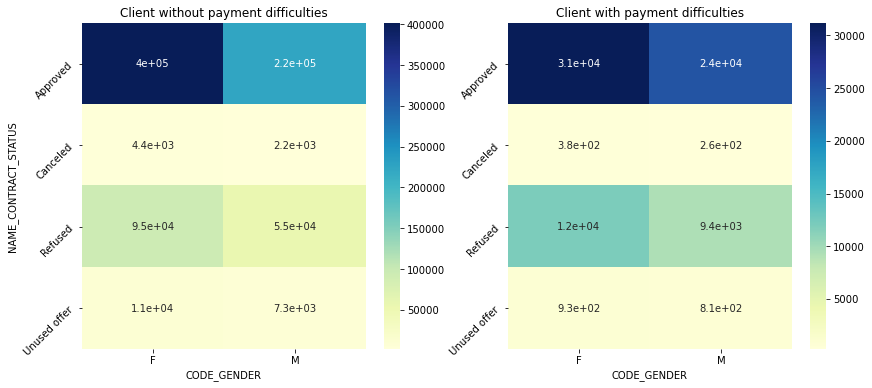

In [169]:
###Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'CODE_GENDER'      
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
income_wise_contarct_type = df_merge_target_0.groupby(['NAME_CONTRACT_STATUS'])['CODE_GENDER'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client without payment difficulties')
plt.yticks(rotation=45)


plt.subplot(1,2,2)
income_wise_contarct_type = df_merge_target_1.groupby(['NAME_CONTRACT_STATUS'])['CODE_GENDER'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client with payment difficulties')
plt.yticks(rotation=45)
plt.ylabel('')
plt.show()

#### Inferences of above Distribution
- Number of female clients is more who Refused loans as compared to male clients for 'Clients with payment difficulities'
- There is very less difference between male and female clients with approved loan for 'Clients with payment difficulities'

##### Distributions for 'NAME_CONTRACT_STATUS' and 'FLAG_OWN_REALTY'

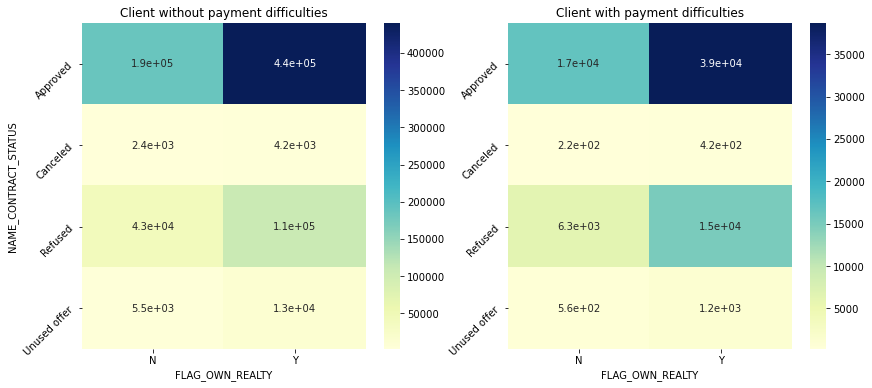

In [170]:
###Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'FLAG_OWN_REALTY'      
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
income_wise_contarct_type = df_merge_target_0.groupby(['NAME_CONTRACT_STATUS'])['FLAG_OWN_REALTY'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client without payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)


plt.subplot(1,2,2)
income_wise_contarct_type = df_merge_target_1.groupby(['NAME_CONTRACT_STATUS'])['FLAG_OWN_REALTY'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client with payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.ylabel('')
plt.show()

#### Inferences of above Distribution
- Number of clients are more who owns a car and refused loans than the clients who does not owns a car
- Range of Clients without difficulities is more then clients with payment difficulities

##### Distributions for 'NAME_CONTRACT_STATUS' and 'NAME_INCOME_TYPE'

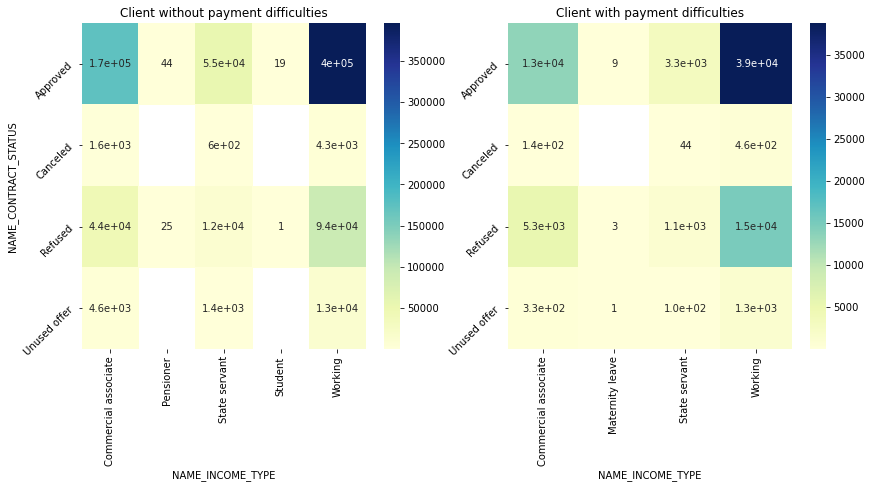

In [171]:
###Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'NAME_INCOME_TYPE'      
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
income_wise_contarct_type = df_merge_target_0.groupby(['NAME_CONTRACT_STATUS'])['NAME_INCOME_TYPE'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client without payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)


plt.subplot(1,2,2)
income_wise_contarct_type = df_merge_target_1.groupby(['NAME_CONTRACT_STATUS'])['NAME_INCOME_TYPE'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client with payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.ylabel('')
plt.show()

#### Inferences of above Distribution
- we can say that loan procedure of Pensioner clients is not cancelled
- There is not any correlation between Pensioner vs unused offer , Student vs Cancelled for clients without payment difficulities
- we can say that , 95% of student loan is apporved for clients without payment difficulities
- There is not any correlation between Maternity leave vs ucancelled for clients with payment difficulities

#### Distribution of 'NAME_CLIENT_TYPE' with different Variable

##### Distribution of 'NAME_CLIENT_TYPE' with 'CODE_GENDER'

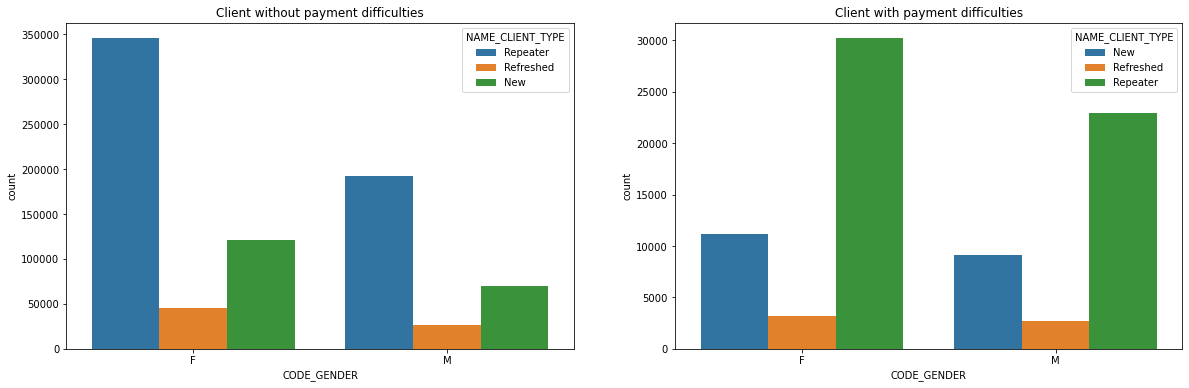

In [172]:
###Plot the graphs of Distribution of 'NAME_CLIENT_TYPE' with 'CODE_GENDER'
plt.figure(figsize=(20,6)) 

plt.subplot(1,2,1)
sns.countplot(data=df_merge_target_0,x='CODE_GENDER',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')

plt.subplot(1,2,2)
sns.countplot(data=df_merge_target_1,x='CODE_GENDER',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties')

plt.show()

#### Inferences of above Distribution
- Repeater Female clients are heights among the data for Clients without payment difficulities
- Number of new clients is very less for both female and male categories in Clients without payment difficulities
- In Clients with payment difficulities, number of Repeater clients is heighest for both male and female category
- Number of Male and Female Refreshed clients is very less for Clients with payment difficulities as comparted to New and Repeater clients

##### Distribution of 'NAME_CLIENT_TYPE' with 'OCCUPATION_TYPE'

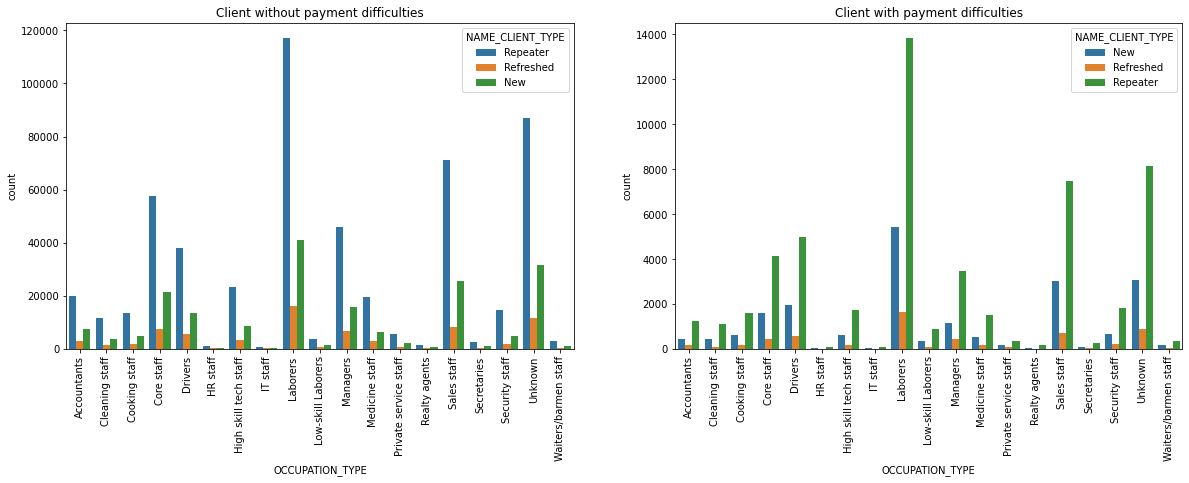

In [173]:
##Plot thedistribution of OCCUPATION_TYPE and NAME_CLIENT_TYPE
plt.figure(figsize=(20,6)) 

plt.subplot(1,2,1)
sns.countplot(data=df_merge_target_0,x='OCCUPATION_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data=df_merge_target_1,x='OCCUPATION_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)

plt.show()

#### Inferences of above Distribution
- Number of Repeated clients is more in every category for Clients with payment difficulities and Clients without Payment difficulities
- Very few clients are available in category HR staff, IT staff, Reality agents for Clients with payment difficulities and Clients without Payment difficulities
- More number of Repeater clients are facing payment difficulities as compared with New and Refreshed clients
- Number of New clients facing payment difficulities is more than Refreshed clients


##### Distribution of 'NAME_CLIENT_TYPE' with 'NAME_INCOME_TYPE'

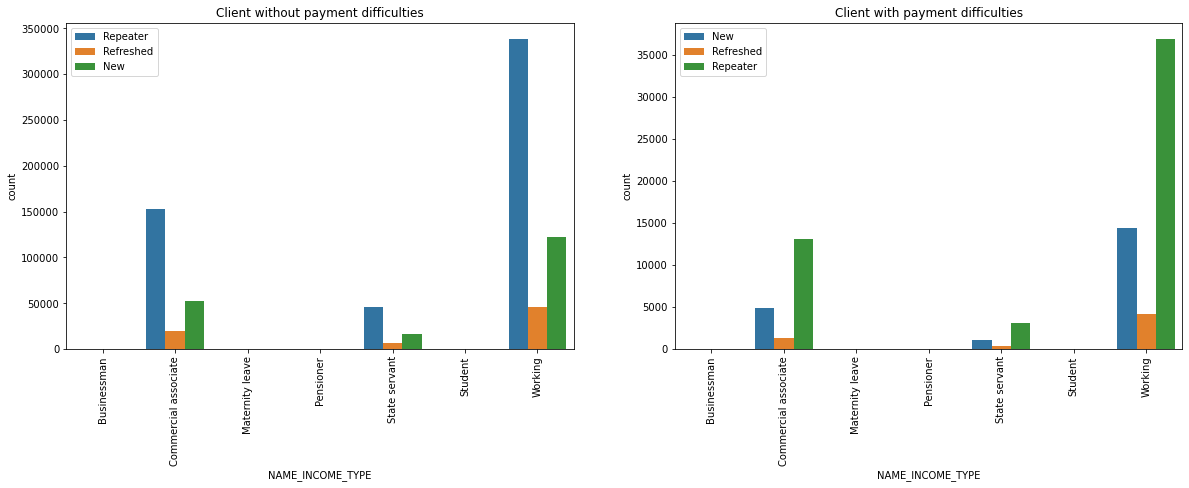

In [174]:
##Plot Distribution of 'NAME_CLIENT_TYPE' with 'NAME_INCOME_TYPE'
plt.figure(figsize=(20,6)) 

plt.subplot(1,2,1)
sns.countplot(data=df_merge_target_0,x='NAME_INCOME_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc=2)

plt.subplot(1,2,2)
sns.countplot(data=df_merge_target_1,x='NAME_INCOME_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc=2)

plt.show()

#### Inferences of above Distribution
- Businessman, Maternity leave, Pensioner, Student clients are not opting for any type of loan
- Working clients have the heighest category in the data
- Number of Repeater clients is more than New and Refreshed clients

##### Distribution of 'NAME_CLIENT_TYPE' with 'NAME_FAMILY_STATUS'

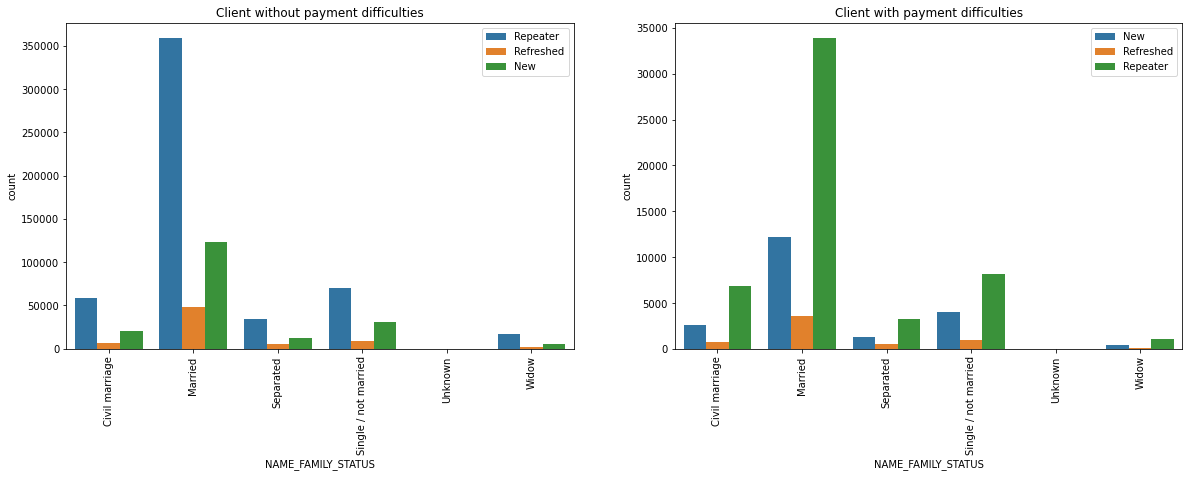

In [175]:
##Plot Distribution of 'NAME_CLIENT_TYPE' with 'NAME_FAMILY_STATUS'
plt.figure(figsize=(20,6)) 

plt.subplot(1,2,1)
sns.countplot(data=df_merge_target_0,x='NAME_FAMILY_STATUS',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc='best')

plt.subplot(1,2,2)
sns.countplot(data=df_merge_target_1,x='NAME_FAMILY_STATUS',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

#### Inferences of above Distribution
- Married clients are heighest among the all categories
- Widow Clients are lowest among all categories
- Number of New clients is more than number of Refreshed clients for clients without payment difficulities

### Analysis Conclusion  :

- Customer Occupation Type greatly effects possibilities of customers being able to repay the company's loan. e.g Occupation type such as IT staff , HR staff , Managers etc have lower difficulity in repayment when observed in comparison to Drivers,Cleaning staff ,laborers


- In general 10% to 15 % of the customers falling into categories  Married , Single/ Not-Married , Seperated etc and belonging to Repeater , New and Refreshed faces difficulity in repaying the loan


- Analysis revels customers having income type Businessman, Maternity leave, Pensioner and Student are not applying for the loan. And Working and commercial associates are the heighest who tends to apply for the loan.


- In general more number of Cash loans are provided by bank in comparison to Revolving loan post chances to get defaulted increases


- To incraeses the chances of repaying the loan provided by the companies should less focus on the clients having income type as Working
